# Elapsed time vs number of steps

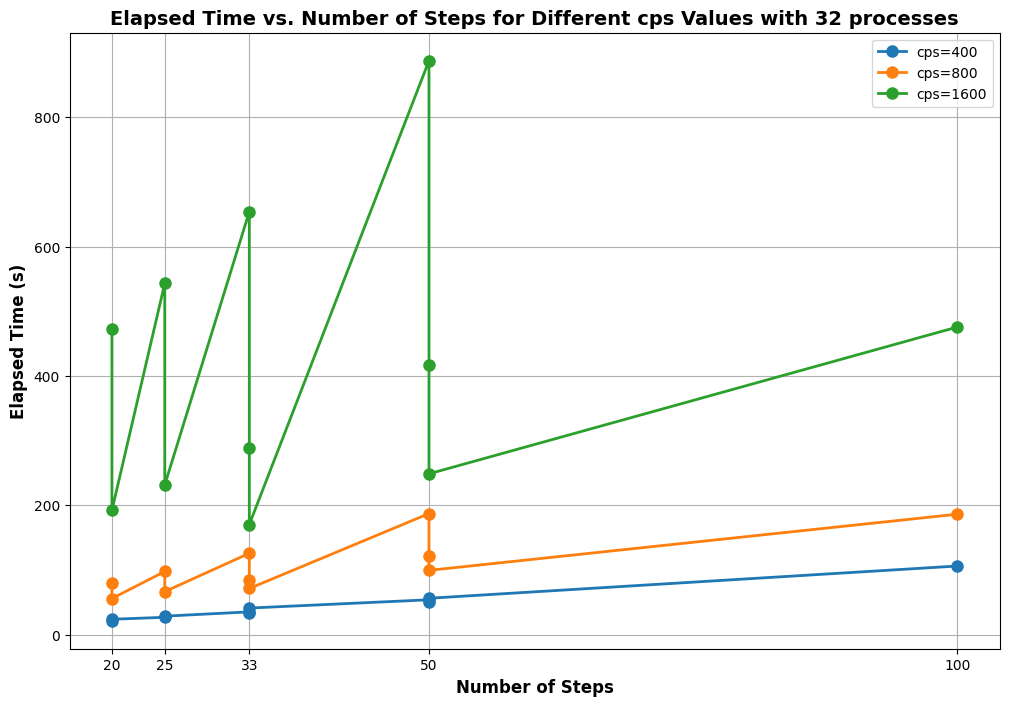

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# load data 
file_path = '/work/m23oc/m23oc/s2517842/Dissertation/asimov-ccs-interface3/src/case_setup/PythonInterface/PerformanceTest/data/results_avg.csv'
df = pd.read_csv(file_path)

# create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  

# collect unique cps values
unique_steps = sorted(df['num_steps'].unique())

# draw lines for each cps value
for cps, group in df.groupby('cps'):
    group = group.sort_values('num_steps')  
    ax.plot(group['num_steps'], group['Elapsed_time'], marker='o', markersize=8, linewidth=2, label=f'cps={cps}')

# set labels and title for the plot 
ax.set_xlabel('Number of Steps', fontsize=12, fontweight='bold')
ax.set_ylabel('Elapsed Time (s)', fontsize=12, fontweight='bold')
ax.set_title('Elapsed Time vs. Number of Steps for Different cps Values with 32 processes', fontsize=14, fontweight='bold')
ax.legend()

# set xticks
ax.set_xticks(unique_steps)

# set grid 
ax.grid(True)

# show the plot
plt.show()


# Elapsed Time vs. Number of Steps for Different cps Values with 64 processes

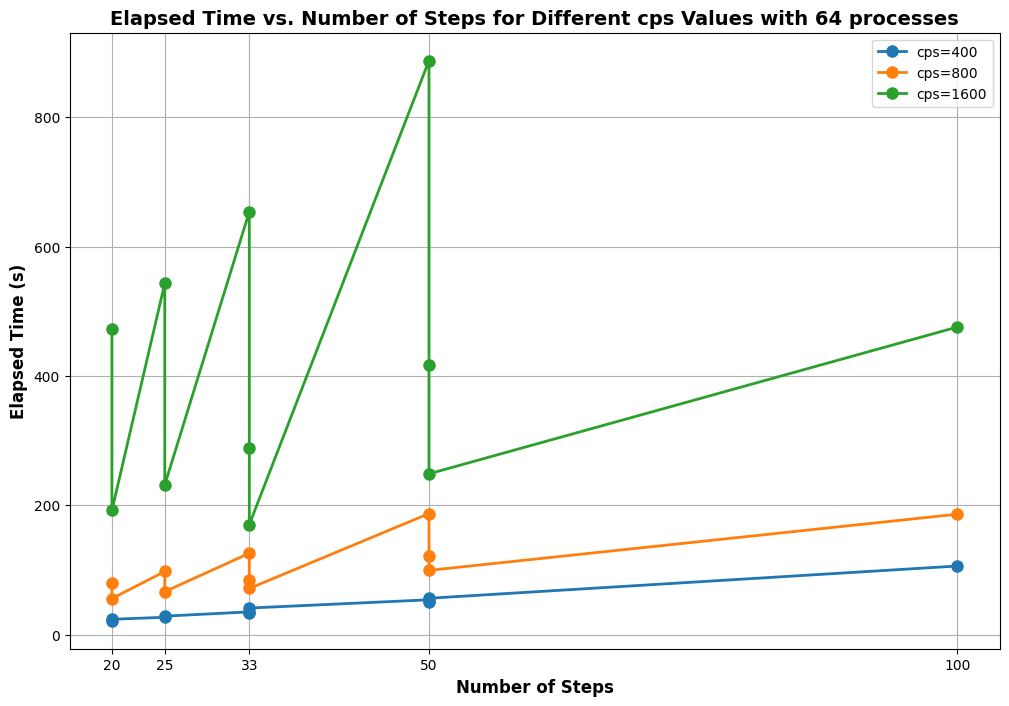

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

# load data 
file_path = '/work/m23oc/m23oc/s2517842/Dissertation/asimov-ccs-interface3/src/case_setup/PythonInterface/PerformanceTest/data/results_avg.csv'
df = pd.read_csv(file_path)

# create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  

# collect unique cps values
unique_steps = sorted(df['num_steps'].unique())

# draw lines for each cps value
for cps, group in df.groupby('cps'):
    group = group.sort_values('num_steps')  
    ax.plot(group['num_steps'], group['Elapsed_time'], marker='o', markersize=8, linewidth=2, label=f'cps={cps}')

# set labels and title for the plot 
ax.set_xlabel('Number of Steps', fontsize=12, fontweight='bold')
ax.set_ylabel('Elapsed Time (s)', fontsize=12, fontweight='bold')
ax.set_title('Elapsed Time vs. Number of Steps for Different cps Values with 64 processes', fontsize=14, fontweight='bold')
ax.legend()

# set xticks
ax.set_xticks(unique_steps)

# set grid 
ax.grid(True)

# show the plot
plt.show()


# Elapsed Time vs. Neq for Different cps Values with 32 processes 

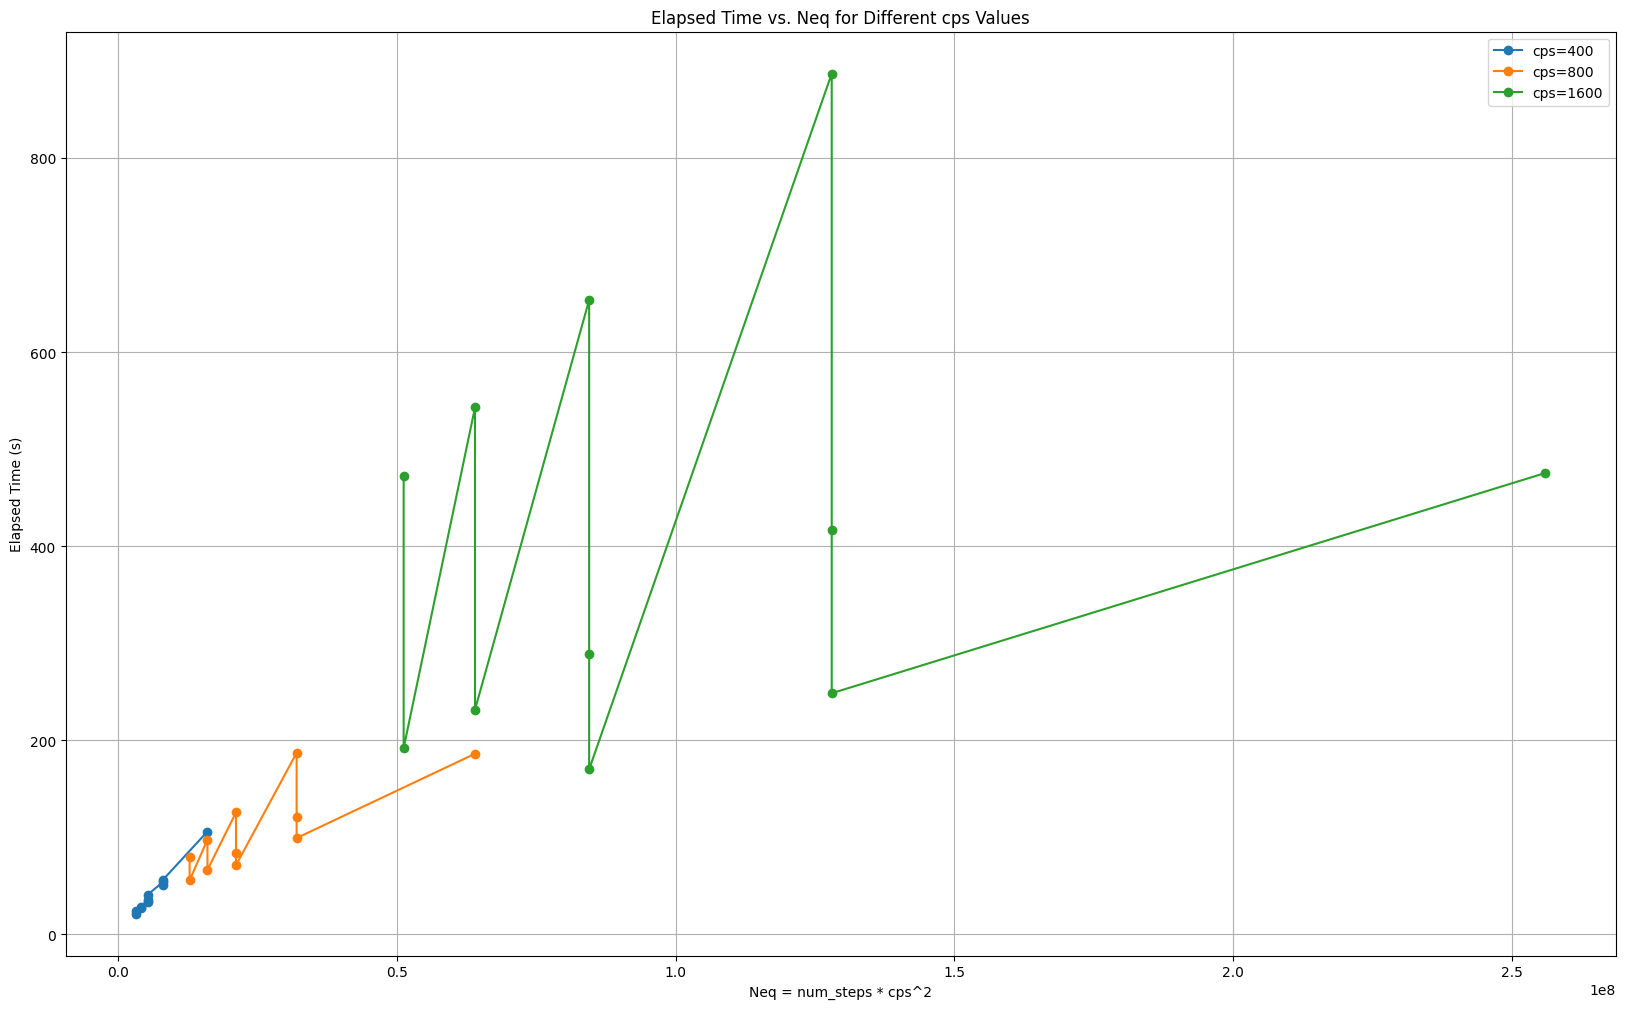

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# load data 
file_path = '/work/m23oc/m23oc/s2517842/Dissertation/asimov-ccs-interface3/src/case_setup/PythonInterface/PerformanceTest/data/results_avg.csv'

# calculate Neq values = num_steps * cps^2
df['Neq'] = df['num_steps'] * df['cps'] ** 2

# create the figure and axis
fig, ax = plt.subplots(figsize=(20, 12))

# plot lines for each cps value
for cps, group in df.groupby('cps'):
    group = group.sort_values('Neq')  # ordered by Neq
    ax.plot(group['Neq'], group['Elapsed_time'], marker='o', label=f'cps={cps}')

# set the labels and title for the plot
ax.set_xlabel('Neq = num_steps * cps^2')
ax.set_ylabel('Elapsed Time (s)')
ax.set_title('Elapsed Time vs. Neq for Different cps Values')
ax.legend()  # add a legend

# set the xticks
ax.grid(True)

# show the plot
plt.show()


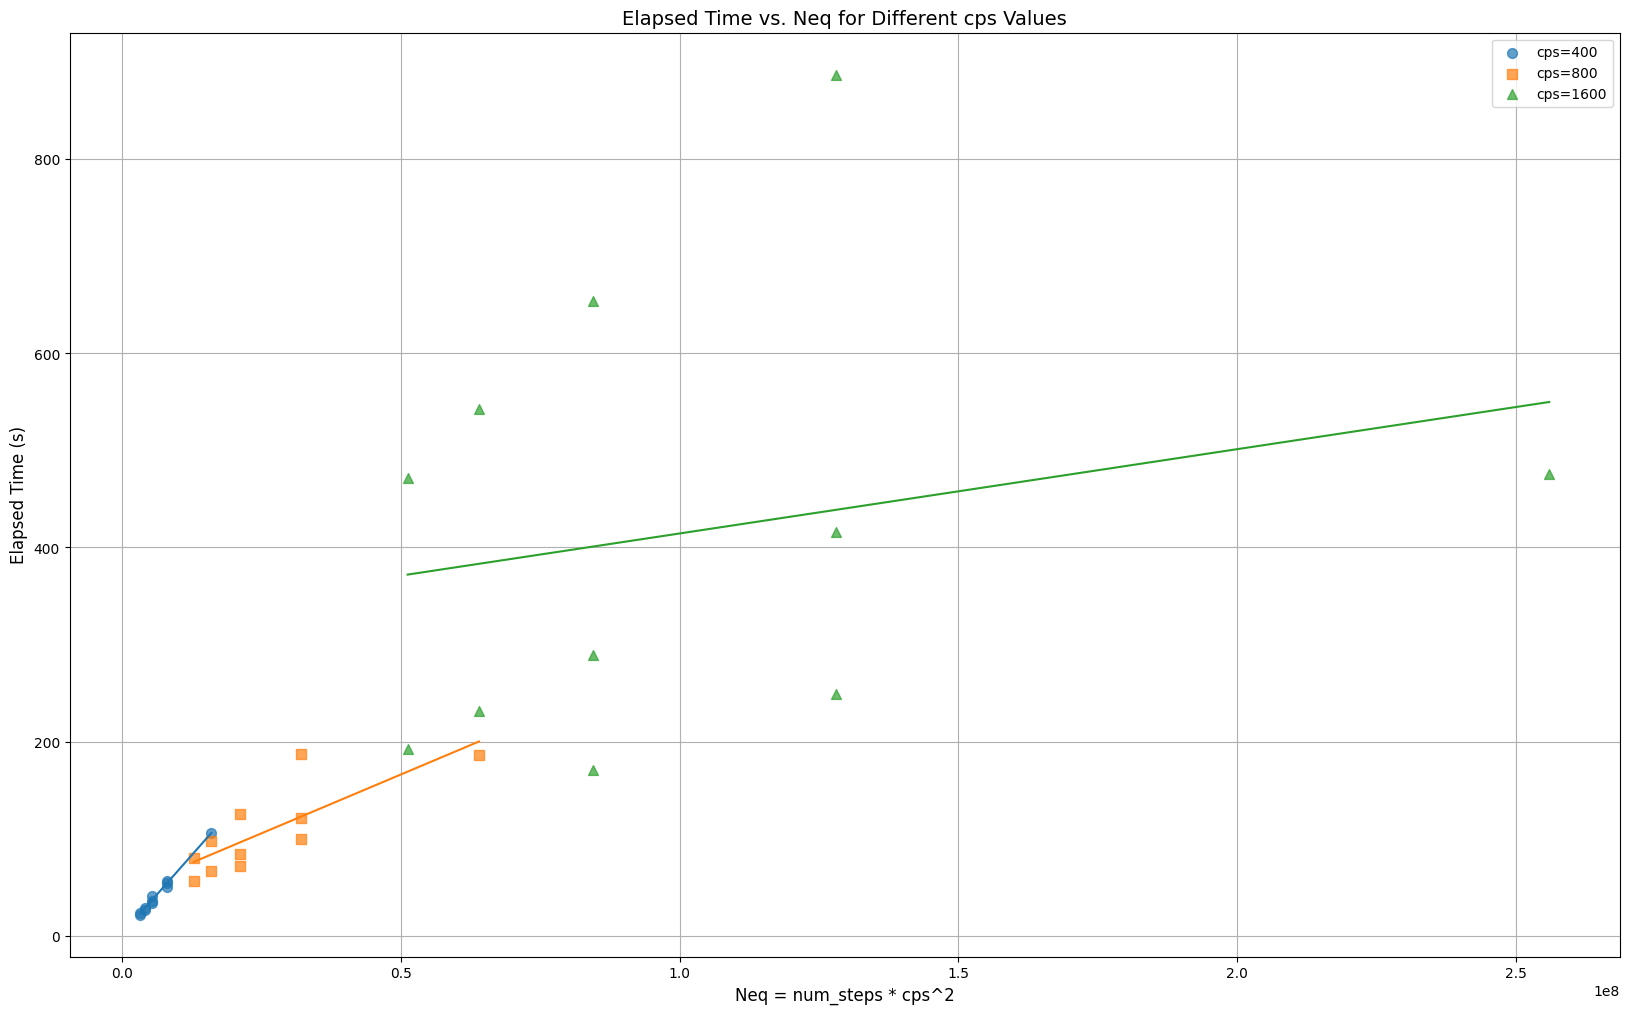

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load data 
file_path = '/work/m23oc/m23oc/s2517842/Dissertation/asimov-ccs-interface3/src/case_setup/PythonInterface/results_avg_32.csv'

# calculate Neq values = num_steps * cps^2
df['Neq'] = df['num_steps'] * df['cps'] ** 2

# create the figure and axis
fig, ax = plt.subplots(figsize=(20, 12))

# preset colors and markers
colors = ['blue', 'orange', 'green']
markers = ['o', 's', '^']
cps_values = df['cps'].unique()

# plot lines for each cps value
for i, cps in enumerate(sorted(cps_values)):
    group = df[df['cps'] == cps].sort_values('Neq')
    ax.scatter(group['Neq'], group['Elapsed_time'], alpha=0.7, marker=markers[i], s=50, label=f'cps={cps}')
    # fit a linear regression line
    z = np.polyfit(group['Neq'], group['Elapsed_time'], 1)
    p = np.poly1d(z)
    ax.plot(group['Neq'], p(group['Neq']))

# set the labels and title for the plot
ax.set_xlabel('Neq = num_steps * cps^2', fontsize=12)
ax.set_ylabel('Elapsed Time (s)', fontsize=12)
ax.set_title('Elapsed Time vs. Neq for Different cps Values', fontsize=14)
ax.legend()  
ax.grid(True)  

# show the plot
plt.show()


# Test Code to plot the error with time 

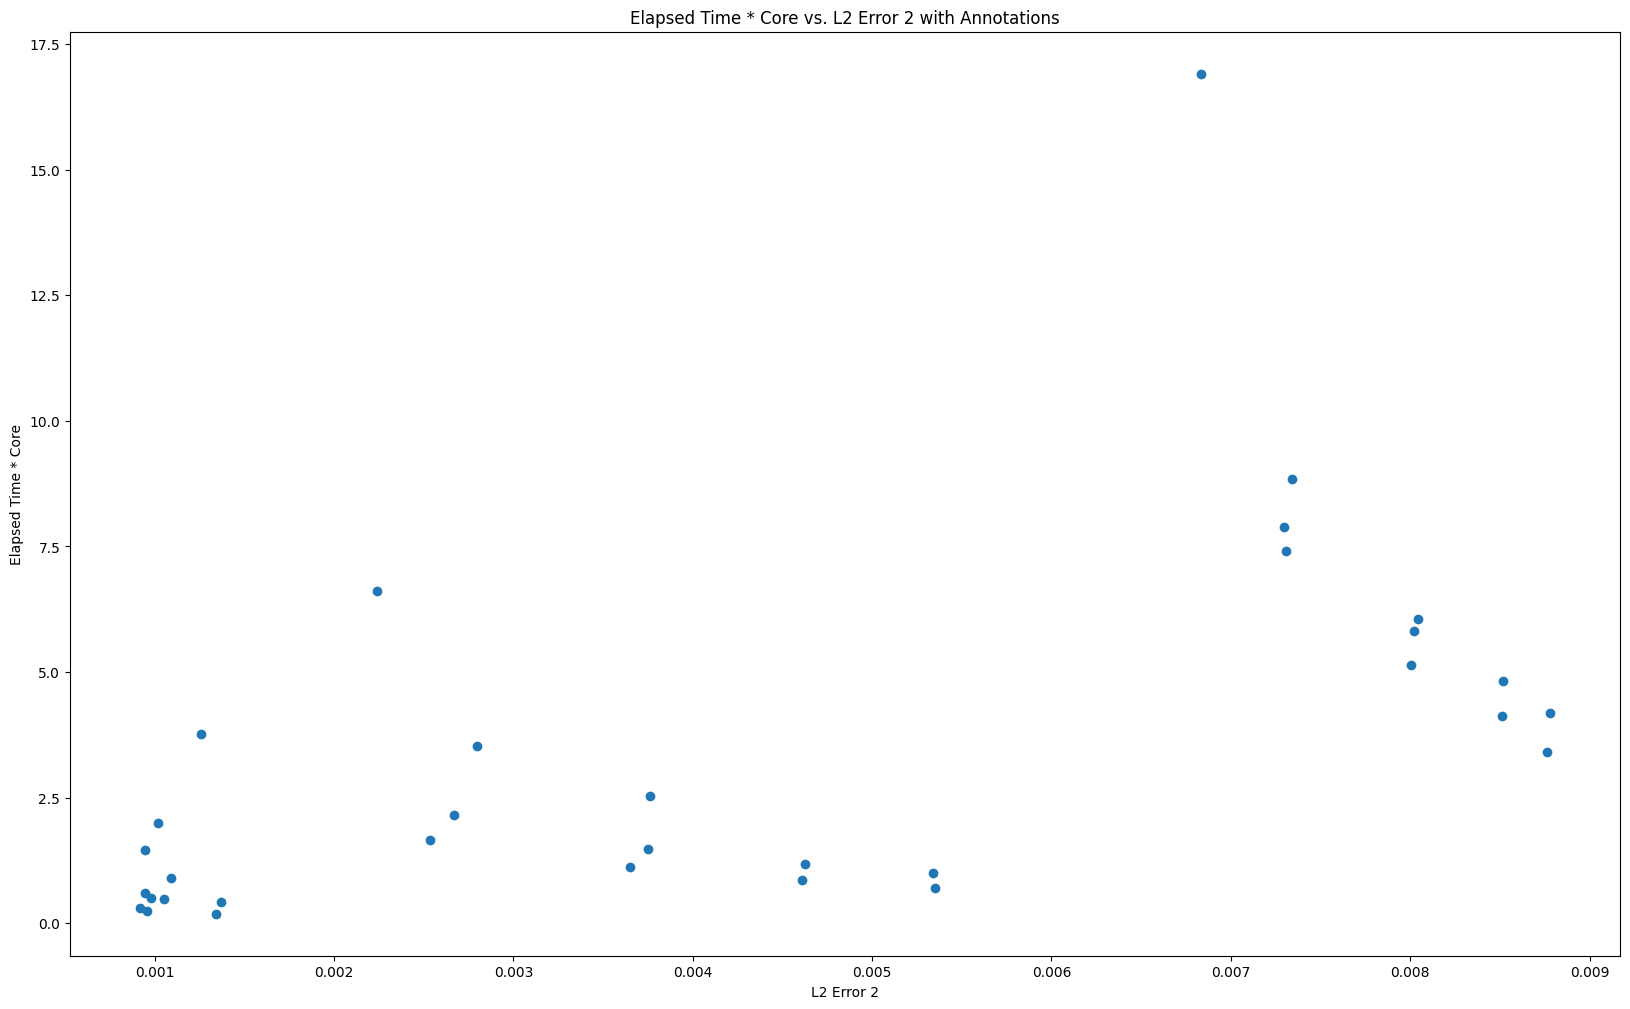

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data has been loaded into a DataFrame named df
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# Calculate 'Elapsed_time * Core'
df['Elapsed_Core'] = df['Elapsed_time'] * df['Core']/60/60

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))
sc = ax.scatter(df['Linf_Error_1'], df['Elapsed_Core'])

ax.set_xlabel('L2 Error 2')
ax.set_ylabel('Elapsed Time * Core')
ax.set_title('Elapsed Time * Core vs. L2 Error 2 with Annotations')
plt.show()


# error_L2_u

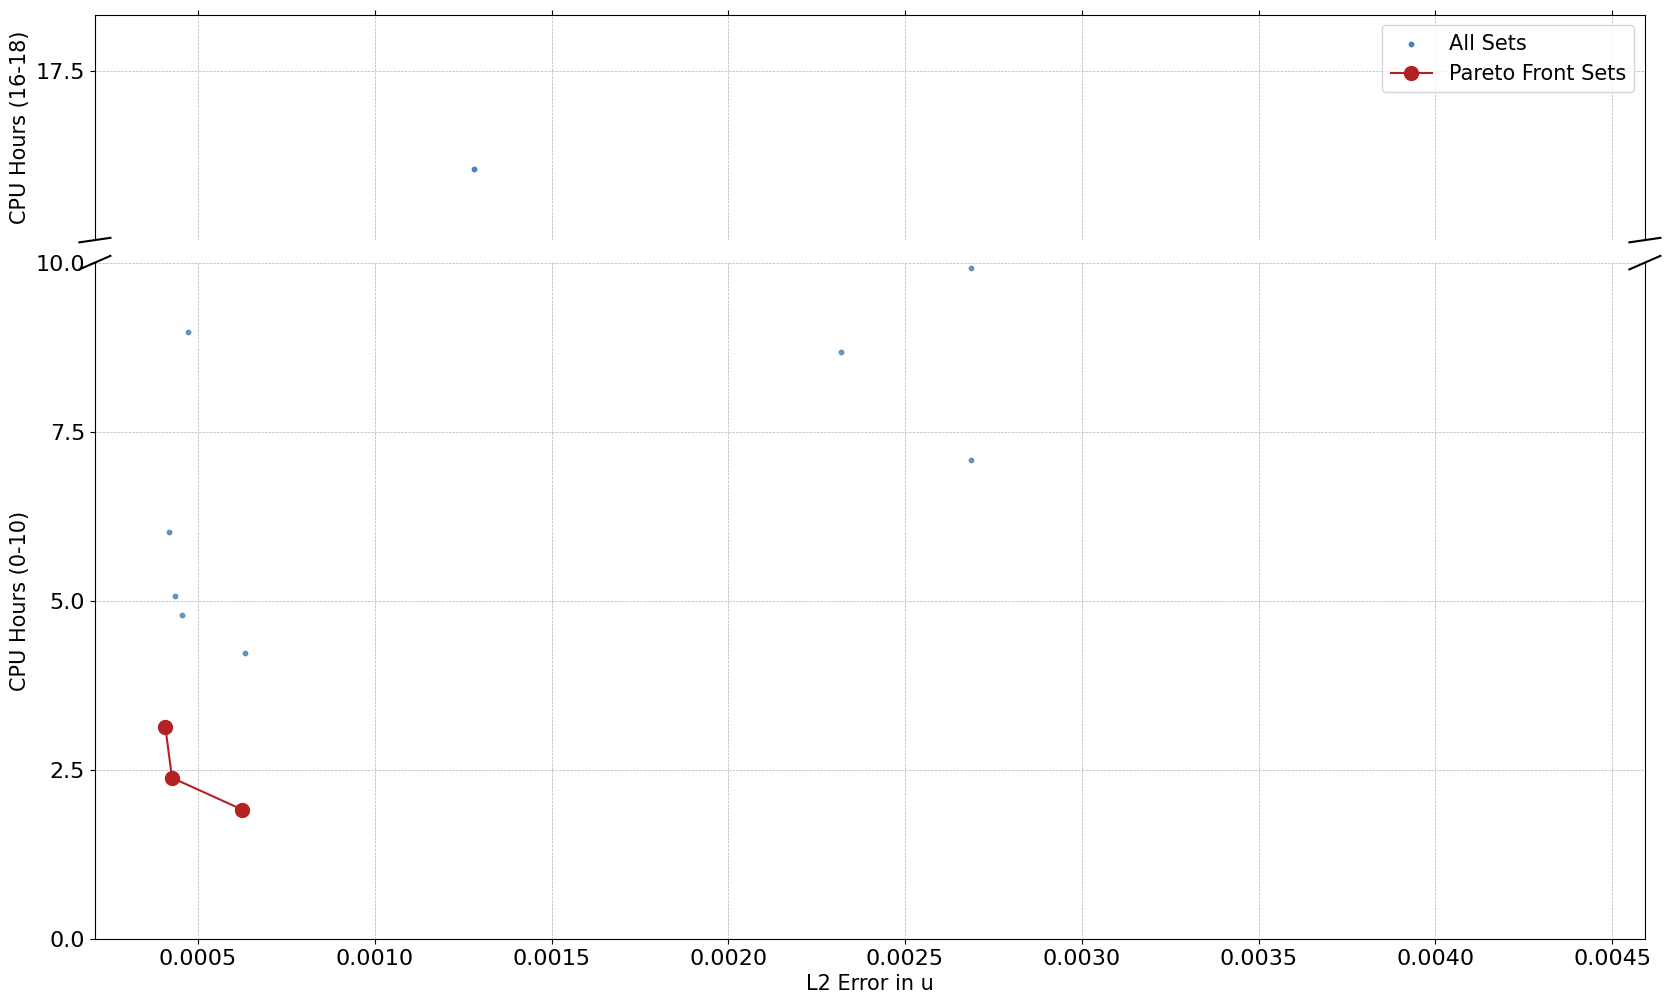

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 360 

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['L2_Error_1', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 2
pareto_points = df[df['Pareto']].sort_values('L2_Error_1')

# use broken axis
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 12), gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.05)  # adjust the space between subplots

ax.tick_params(axis='both', which='major', labelsize=16)  # adjust the font size of the ticks
ax2.tick_params(axis='both', which='major', labelsize=16)

# plot the Pareto front curve 
ax.scatter(df['L2_Error_1'], df['CPU_hours'], color='#4682B4', label='All Sets', alpha=1, s=10)  # adjust the size of all points
ax.plot(pareto_points['L2_Error_1'], pareto_points['CPU_hours'], color='#B22222', marker='o', label='Pareto Front Sets', markersize=10)  # adjust the size of the Pareto front points

ax2.scatter(df['L2_Error_1'], df['CPU_hours'], color='#4682B4', alpha=0.8, s=10)
ax2.plot(pareto_points['L2_Error_1'], pareto_points['CPU_hours'], color='#B22222', marker='o', markersize=10)

# set the y-axis ticks
ax.yaxis.set_major_locator(MultipleLocator(2.5))
ax2.yaxis.set_major_locator(MultipleLocator(2.5))


ax.set_ylim(16, 18)  
ax2.set_ylim(0, 10)  

# hide spines
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # not to show labels at the top
ax2.xaxis.tick_bottom()

# add diagonal lines to indicate the broken axes
d = .01  # length of the diagonal lines
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  

# add labels and legend
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlabel('L2 Error in u', fontsize=15)
ax.set_ylabel('CPU Hours (16-18)', fontsize=15)
ax2.set_ylabel('CPU Hours (0-10)', fontsize=15)
ax.legend(fontsize=15)
plt.show()




## modified  version

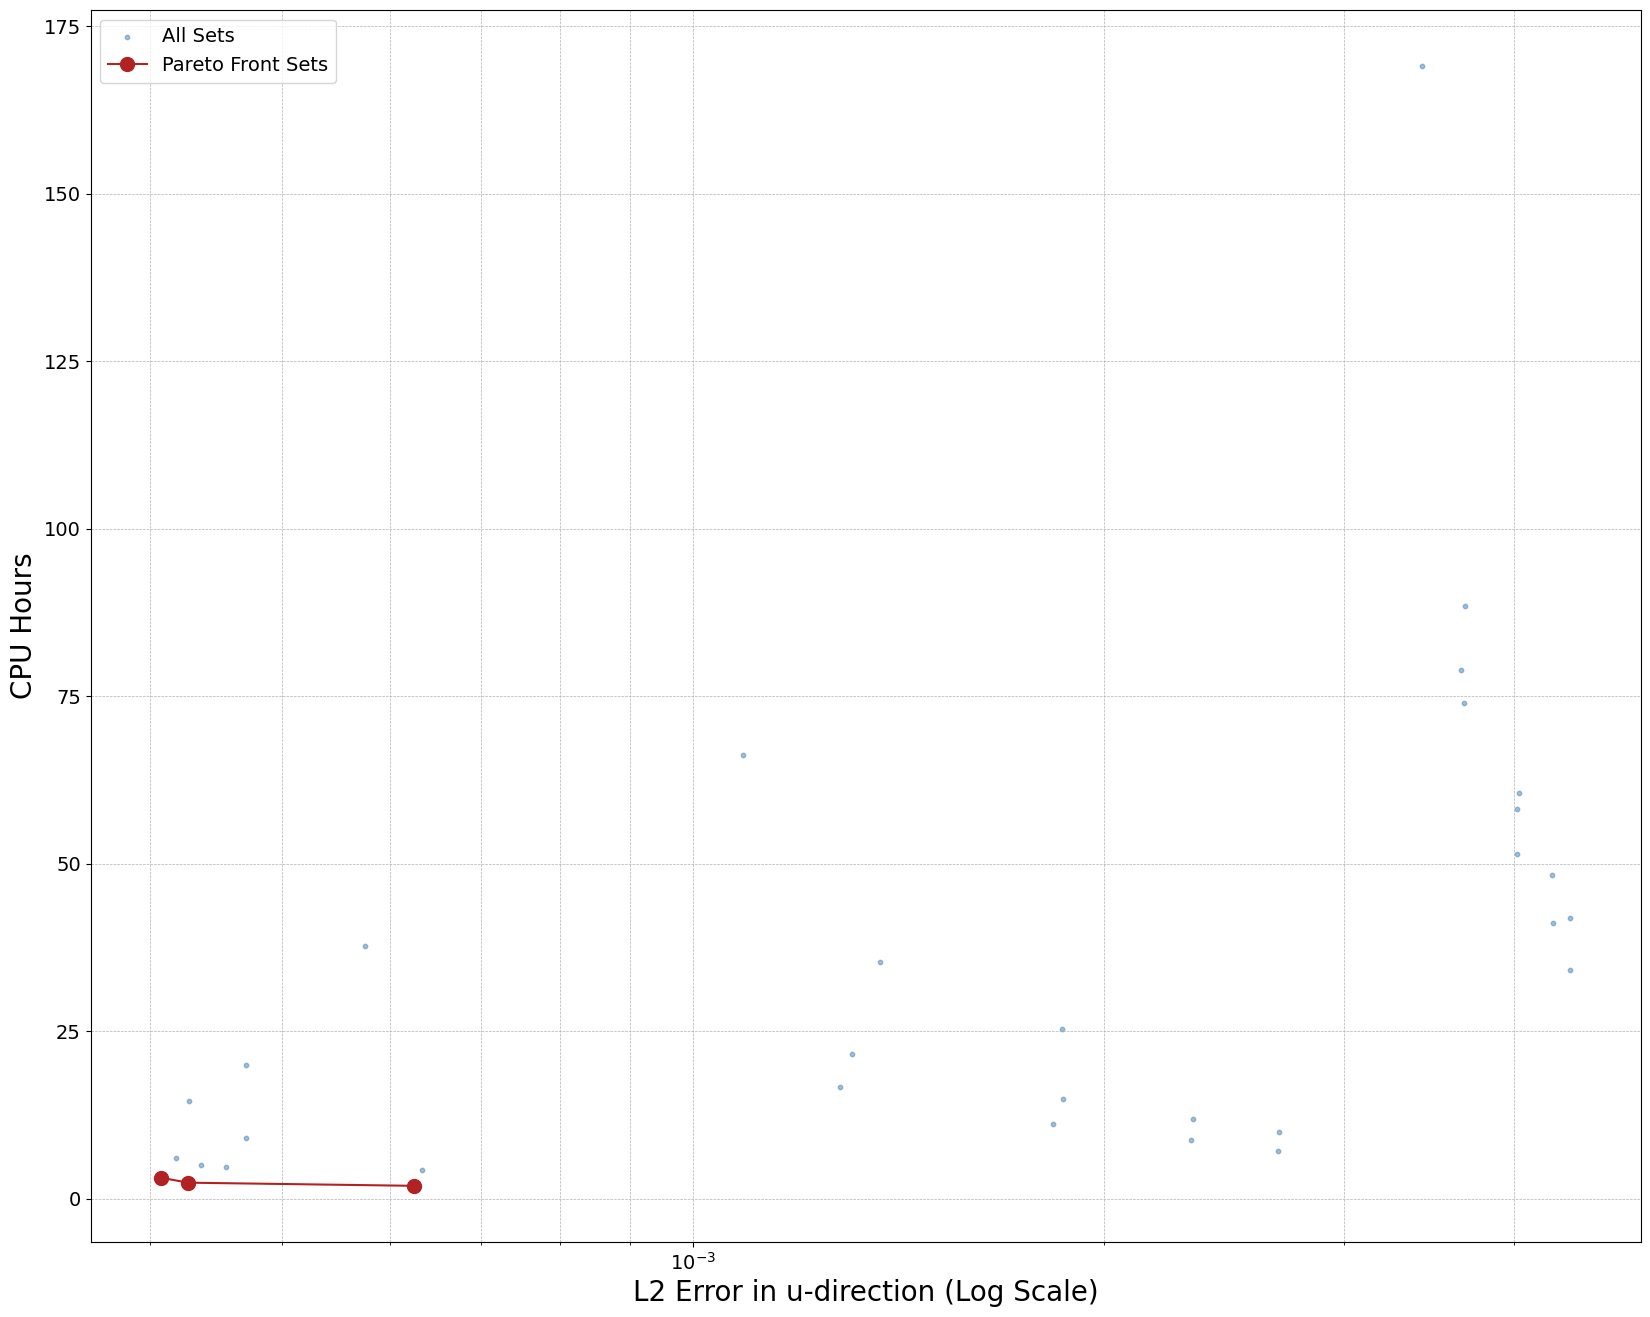

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 360 

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['L2_Error_1', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('L2_Error_1')

# Plotting
fig, ax = plt.subplots(figsize=(20, 16))

# Set log scale for error
ax.set_xscale('log')

# Plot all points and Pareto front curve
ax.scatter(df['L2_Error_1'], df['CPU_hours'], color='#4682B4', label='All Sets', alpha=0.5, s=10)
ax.plot(pareto_points['L2_Error_1'], pareto_points['CPU_hours'], color='#B22222', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('L2 Error in u-direction (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=14)

plt.show()


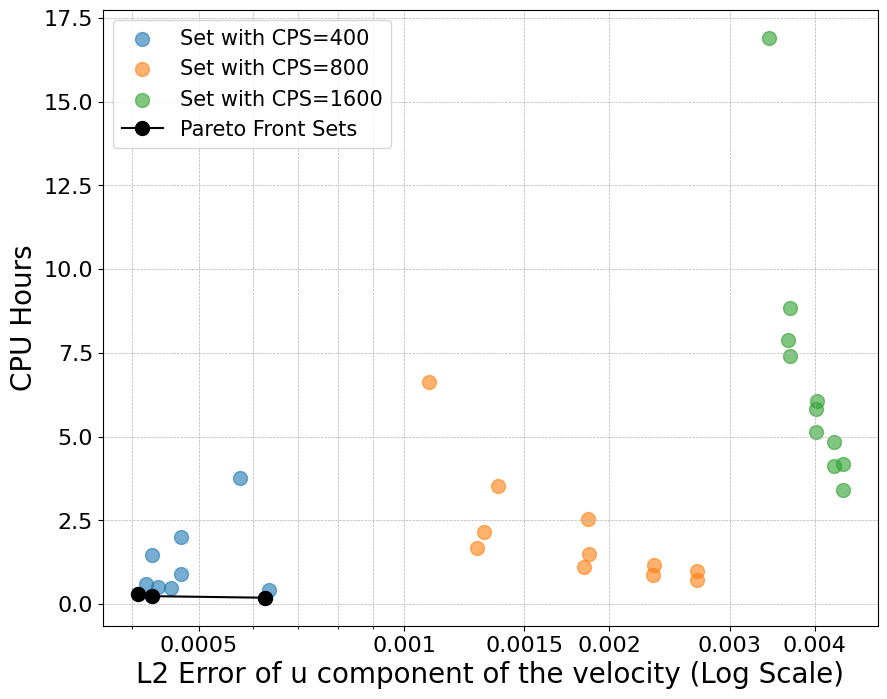

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['L2_Error_1', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('L2_Error_1')

# Plotting
fig, ax = plt.subplots(figsize=(10,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0,  0.0005, 0.001, 0.0015, 0.002, 0.003,  0.004, 0.005]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=20)

# use different colors for different CPS values
cps_values = df['cps'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
color_map = dict(zip(cps_values, colors))

# Plot all points with color according to CPS value
for cps, color in color_map.items():
    subset = df[df['cps'] == cps]
    ax.scatter(subset['L2_Error_1'], subset['CPU_hours'], color=color, label=f'Set with CPS={cps}', alpha=0.6, s=100)

# Plot Pareto front curve
ax.plot(pareto_points['L2_Error_1'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('L2 Error of u component of the velocity (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=15)

plt.show()

# Save the plot as an image file
fig.savefig('error_L2_u_1.png')


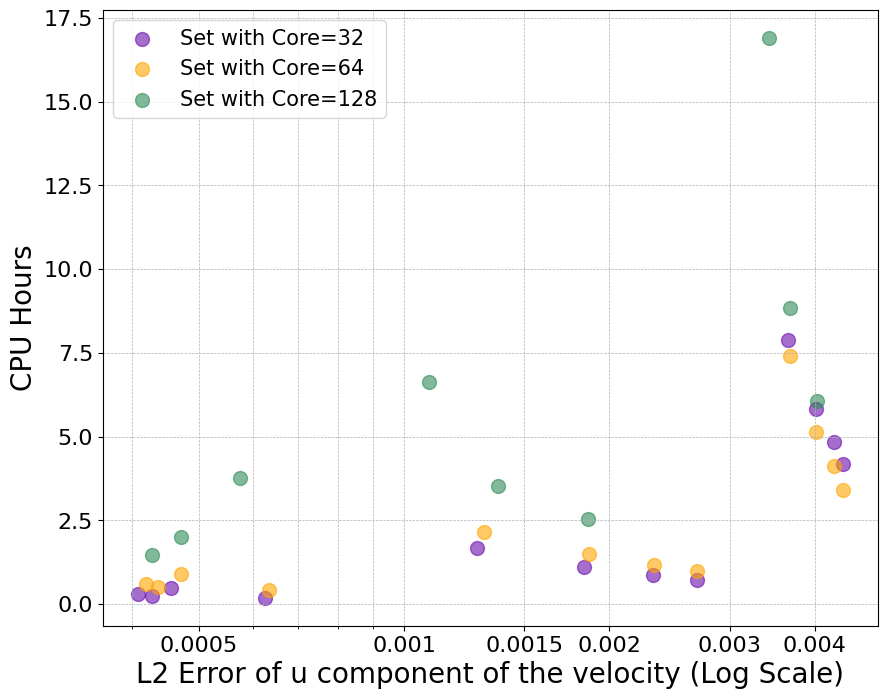

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['L2_Error_1', 'CPU_hours']].values
# pareto = identify_pareto(scores)
# df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
# pareto_points = df[df['Pareto']].sort_values('L2_Error_1')

# Plotting
fig, ax = plt.subplots(figsize=(10,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0, 0.0005, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005]
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=20)

# use different colors for different Core values
core_values = df['Core'].unique()
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # more colors can be added if needed
colors = ['#6a0dad','#ffa500','#2e8b57']  
color_map = dict(zip(core_values, colors))

# Plot all points with color according to Core value
for core, color in color_map.items():
    subset = df[df['Core'] == core]
    ax.scatter(subset['L2_Error_1'], subset['CPU_hours'], color=color, label=f'Set with Core={core}', alpha=0.6, s=100)

# Plot Pareto front curve
# ax.plot(pareto_points['L2_Error_1'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('L2 Error of u component of the velocity (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=15)

plt.show()

# Save the plot as an image file
# fig.savefig('error_L2_u_cores.png', dpi=300)  # Adjust dpi for higher resolution


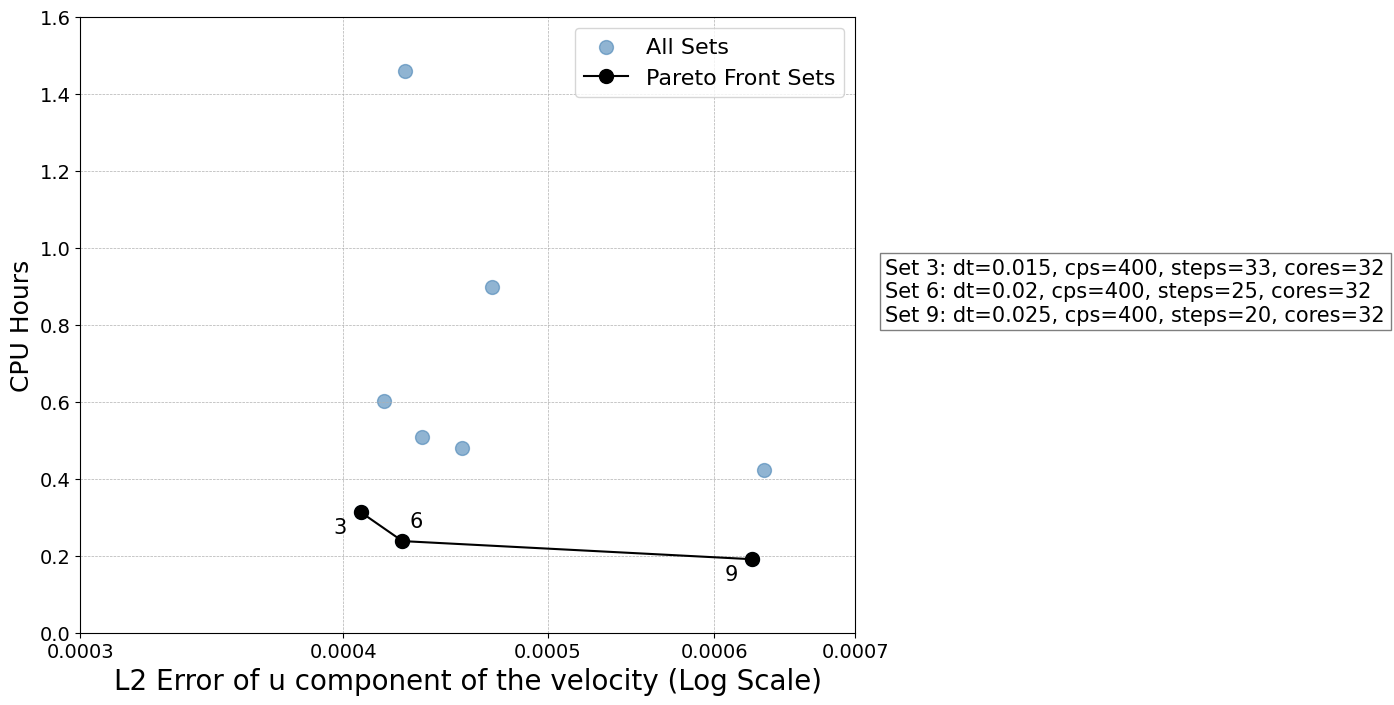

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600  

def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

scores = df[['L2_Error_1', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

pareto_points = df[df['Pareto']].sort_values('L2_Error_1')

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale('log')

xticks = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]  # choose appropriate ticks based on your data  
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=14)

ax.tick_params(axis='y', which='major', labelsize=14)  # set the font size of the y-axis ticks

ax.scatter(df['L2_Error_1'], df['CPU_hours'], color='#4682B4', label='All Sets', alpha=0.6, s=100) 
ax.plot(pareto_points['L2_Error_1'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10) 

# set the axis to zoom in the area of small L2 Error 2 and CPU hours
ax.set_xlim(3e-4, 7e-4) 
ax.set_ylim(0, 1.6)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# mark the Pareto front points with their index
for index, row in pareto_points.iterrows():
    if row['L2_Error_1'] <= 0.05 and row['CPU_hours'] <= 1.5: 
        vertical_offset = 10 if index % 2 == 0 else -15  
        ax.annotate(index, (row['L2_Error_1'], row['CPU_hours']), textcoords="offset points", xytext=(vertical_offset, vertical_offset), ha='center', fontsize=15)

# Add a text box to show the details of the Pareto front points
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={row['cps']}, steps={row['num_steps']}, cores={row['Core']}"
    for index, row in pareto_points.iterrows()
    if row['L2_Error_1'] <= 0.05 and row['CPU_hours'] <= 1.5
])

plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))
# 
plt.xlabel('L2 Error of u component of the velocity (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=18)
ax.legend(fontsize=16)  
plt.show()

plt.tight_layout()  # Adjust subplots to fit into figure area.
fig.savefig('error_L2_u_2.png')


# error_L2_v

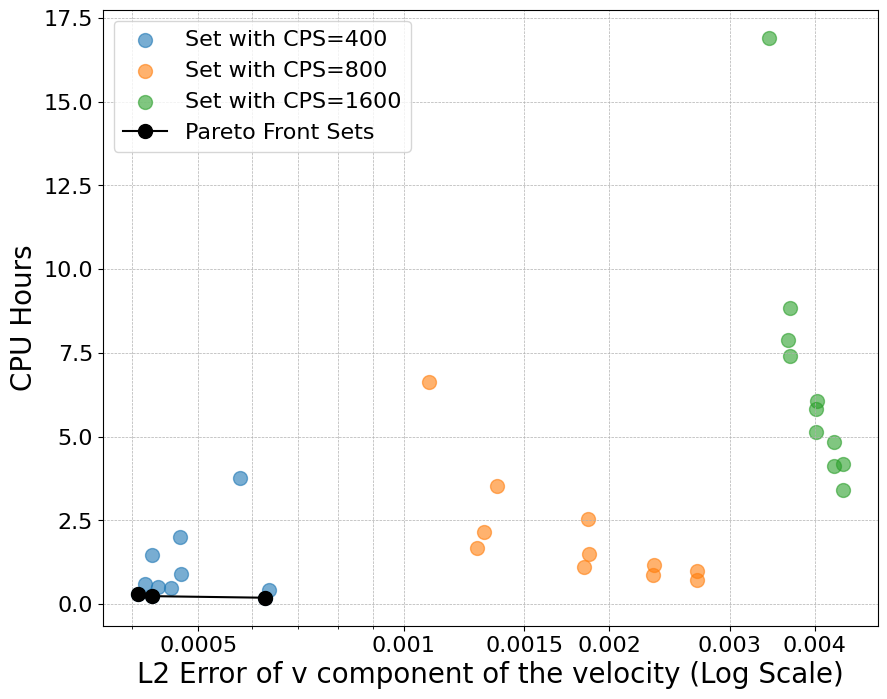

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600 

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['L2_Error_2', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('L2_Error_2')

# Plotting
fig, ax = plt.subplots(figsize=(10,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0, 0.0005, 0.001, 0.0015, 0.002,   0.003,  0.004]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=20)

# use different colors for different CPS values
cps_values = df['cps'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
color_map = dict(zip(cps_values, colors))

# Plot all points with color according to CPS value
for cps, color in color_map.items():
    subset = df[df['cps'] == cps]
    ax.scatter(subset['L2_Error_2'], subset['CPU_hours'], color=color, label=f'Set with CPS={cps}', alpha=0.6, s=100)

# Plot Pareto front curve
ax.plot(pareto_points['L2_Error_2'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('L2 Error of v component of the velocity (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=16)

plt.show()
fig.savefig('error_L2_v_1.png')



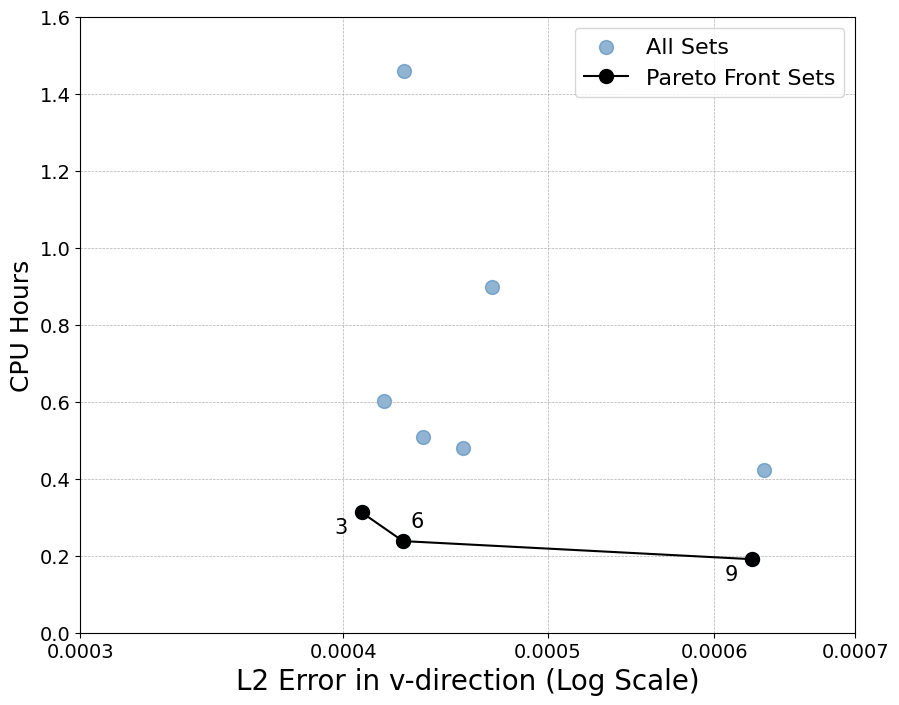

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600  

def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

scores = df[['L2_Error_2', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

pareto_points = df[df['Pareto']].sort_values('L2_Error_2')

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale('log')

xticks = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]  # choose appropriate ticks based on your data  
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=14)

ax.tick_params(axis='y', which='major', labelsize=14)  # set the font size of the y-axis ticks

ax.scatter(df['L2_Error_2'], df['CPU_hours'], color='#4682B4', label='All Sets', alpha=0.6, s=100) 
ax.plot(pareto_points['L2_Error_2'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10) 

# set the axis to zoom in the area of small L2 Error 2 and CPU hours
ax.set_xlim(3e-4, 7e-4) 
ax.set_ylim(0, 1.6)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# mark the Pareto front points with their index
for index, row in pareto_points.iterrows():
    if row['L2_Error_2'] <= 0.05 and row['CPU_hours'] <= 1.5: 
        vertical_offset = 10 if index % 2 == 0 else -15 
        ax.annotate(index, (row['L2_Error_2'], row['CPU_hours']), textcoords="offset points", xytext=(vertical_offset, vertical_offset), ha='center', fontsize=15)

# Add a text box to show the details of the Pareto front points
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={row['cps']}, steps={row['num_steps']}, cores={row['Core']}"
    for index, row in pareto_points.iterrows()
    if row['L2_Error_2'] <= 0.05 and row['CPU_hours'] <= 1.5
])

# plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('L2 Error in v-direction (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=18)
ax.legend(fontsize=16)  
plt.show()
fig.savefig('error_L2_v_3.png')


# error_L2 sqrt(u^2+v^2)
df['L2_Error_sqrt'] = np.sqrt(df['L2_Error_1']**2 + df['L2_Error_2']**2)

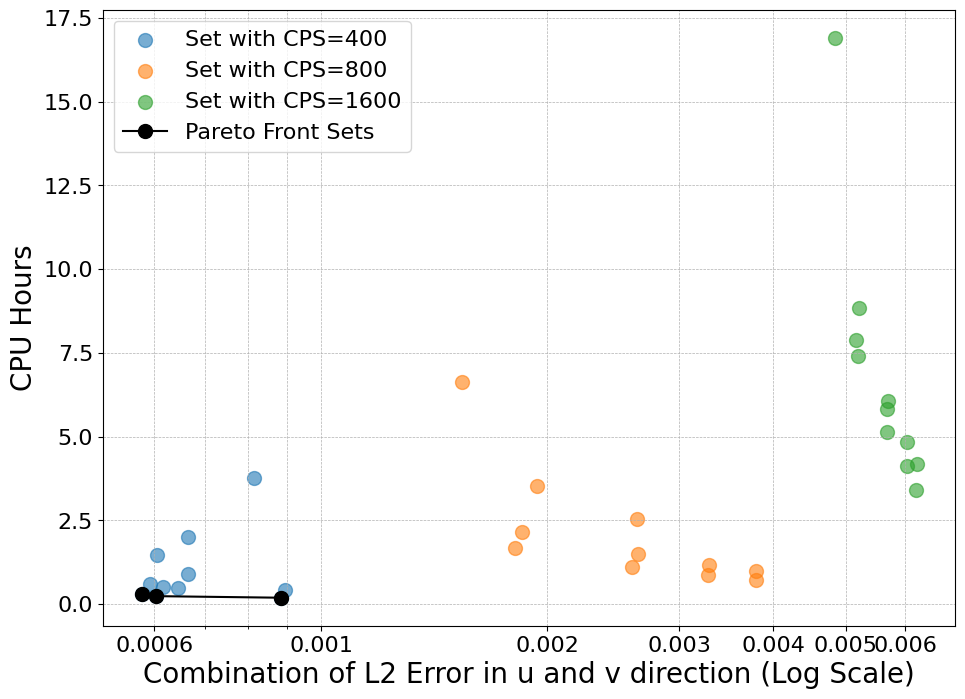

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600 
df['L2_Error_sqrt'] = np.sqrt(df['L2_Error_1']**2 + df['L2_Error_2']**2)

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['L2_Error_sqrt', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('L2_Error_sqrt')

# Plotting
fig, ax = plt.subplots(figsize=(11,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0.0006,0.001,0.002, 0.003, 0.004, 0.005, 0.006]  # removed 0 from the ticks
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=16)

# Use different colors for different CPS values
cps_values = df['cps'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
color_map = dict(zip(cps_values, colors))

# Plot all points with color according to CPS value
for cps, color in color_map.items():
    subset = df[df['cps'] == cps]
    ax.scatter(subset['L2_Error_sqrt'], subset['CPU_hours'], color=color, label=f'Set with CPS={cps}', alpha=0.6, s=100)

# Plot Pareto front curve
ax.plot(pareto_points['L2_Error_sqrt'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('Combination of L2 Error in u and v direction (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=16)

plt.show()
fig.savefig('error_L2_sqrt_1.png')


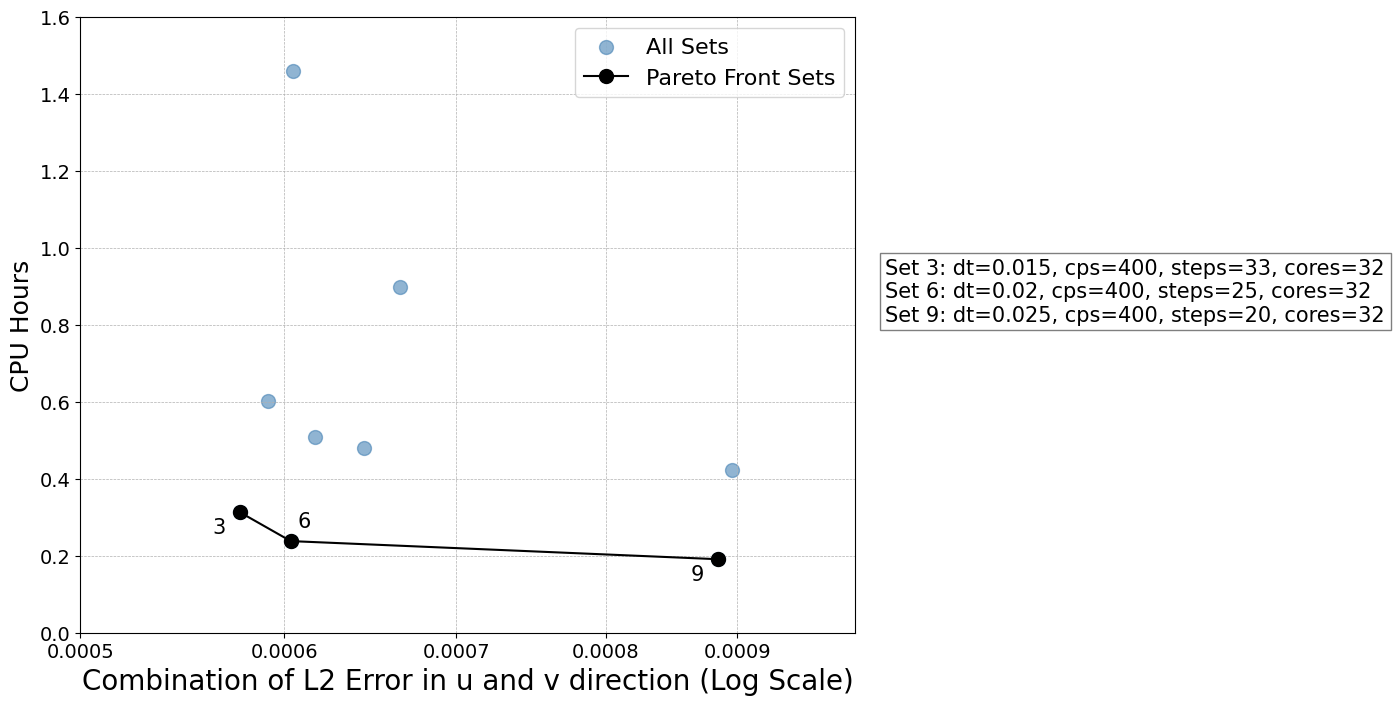

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600  
df['L2_Error_sqrt'] = np.sqrt(df['L2_Error_1']**2 + df['L2_Error_2']**2)
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

scores = df[['L2_Error_sqrt', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

pareto_points = df[df['Pareto']].sort_values('L2_Error_sqrt')

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale('log')

xticks = [0.0005, 0.0006, 0.0007, 0.0008, 0.0009]  # choose appropriate ticks based on your data  
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=14)

ax.tick_params(axis='y', which='major', labelsize=14)  # set the font size of the y-axis ticks

ax.scatter(df['L2_Error_sqrt'], df['CPU_hours'], color='#4682B4', label='All Sets', alpha=0.6, s=100) 
ax.plot(pareto_points['L2_Error_sqrt'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10) 

# set the axis to zoom in the area of small L2 Error 2 and CPU hours
ax.set_xlim(0.0005,  0.001) 
ax.set_ylim(0, 1.6)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# mark the Pareto front points with their index
for index, row in pareto_points.iterrows():
    if row['L2_Error_sqrt'] <= 0.05 and row['CPU_hours'] <= 1.5: 
        vertical_offset = 10 if index % 2 == 0 else -15 
        ax.annotate(index, (row['L2_Error_sqrt'], row['CPU_hours']), textcoords="offset points", xytext=(vertical_offset, vertical_offset), ha='center', fontsize=15)

# Add a text box to show the details of the Pareto front points
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={row['cps']}, steps={row['num_steps']}, cores={row['Core']}"
    for index, row in pareto_points.iterrows()
    if row['L2_Error_sqrt'] <= 0.05 and row['CPU_hours'] <= 1.5
])

plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Combination of L2 Error in u and v direction (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=18)
ax.legend(fontsize=16)  
plt.show()
fig.savefig('error_L2_sqrt_2.png')



# error_L2_p

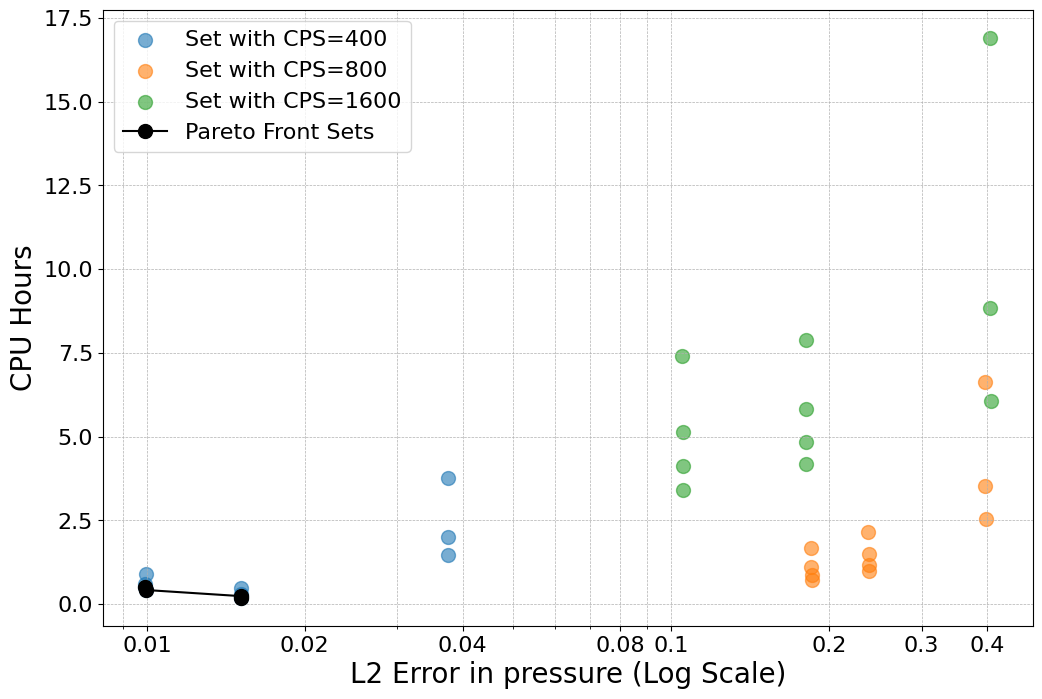

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600 

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['L2_Error_3', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('L2_Error_3')

# Plotting
fig, ax = plt.subplots(figsize=(12,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0, 0.005, 0.01, 0.02, 0.04, 0.08, 0.10, 0.20, 0.30, 0.40]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=16)

# use different colors for different CPS values
cps_values = df['cps'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
color_map = dict(zip(cps_values, colors))

# Plot all points with color according to CPS value
for cps, color in color_map.items():
    subset = df[df['cps'] == cps]
    ax.scatter(subset['L2_Error_3'], subset['CPU_hours'], color=color, label=f'Set with CPS={cps}', alpha=0.6, s=100)

# Plot Pareto front curve
ax.plot(pareto_points['L2_Error_3'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('L2 Error in pressure (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=16)

plt.show()
fig.savefig('error_L2_p_1.png')



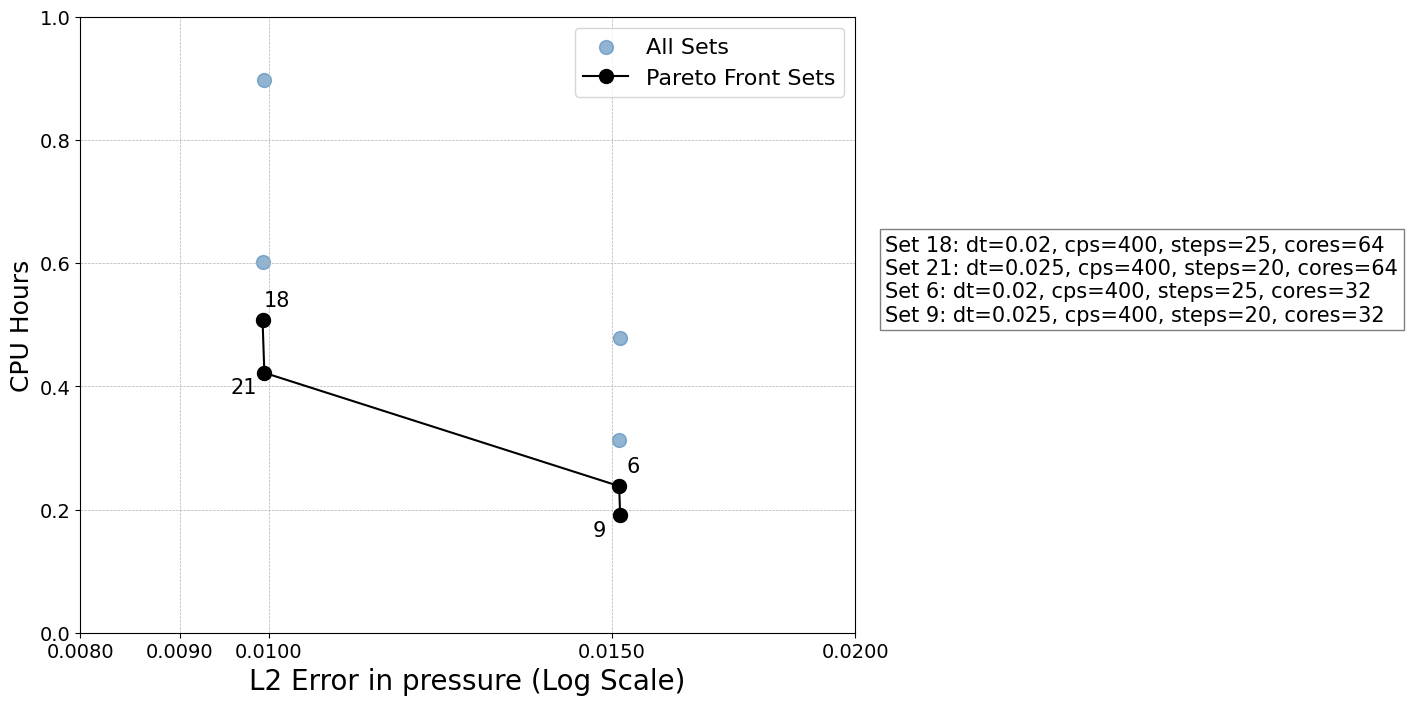

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600  

def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

scores = df[['L2_Error_3', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

pareto_points = df[df['Pareto']].sort_values('L2_Error_3')

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale('log')

xticks = [0, 0.008, 0.009, 0.01, 0.015, 0.02]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=14)

ax.tick_params(axis='y', which='major', labelsize=14)  # set the font size of the y-axis ticks

ax.scatter(df['L2_Error_3'], df['CPU_hours'], color='#4682B4', label='All Sets', alpha=0.6, s=100) 
ax.plot(pareto_points['L2_Error_3'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10) 

# set the axis to zoom in the area of small L2 Error 2 and CPU hours
ax.set_xlim( 0.008, 0.02) 
ax.set_ylim(0, 1.0)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# mark the Pareto front points with their index
for index, row in pareto_points.iterrows():
    if row['L2_Error_3'] <= 0.05 and row['CPU_hours'] <= 1.5: 
        vertical_offset = 10 if index % 2 == 0 else -15  
        ax.annotate(index, (row['L2_Error_3'], row['CPU_hours']), textcoords="offset points", xytext=(vertical_offset, vertical_offset), ha='center', fontsize=15)

# Add a text box to show the details of the Pareto front points
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={row['cps']}, steps={row['num_steps']}, cores={row['Core']}"
    for index, row in pareto_points.iterrows()
    if row['L2_Error_3'] <= 0.05 and row['CPU_hours'] <= 1.5
])

plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('L2 Error in pressure (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=18)
ax.legend(fontsize=16)  
plt.show()
fig.savefig('error_L2_p_3.png')



# Error_Linf_u

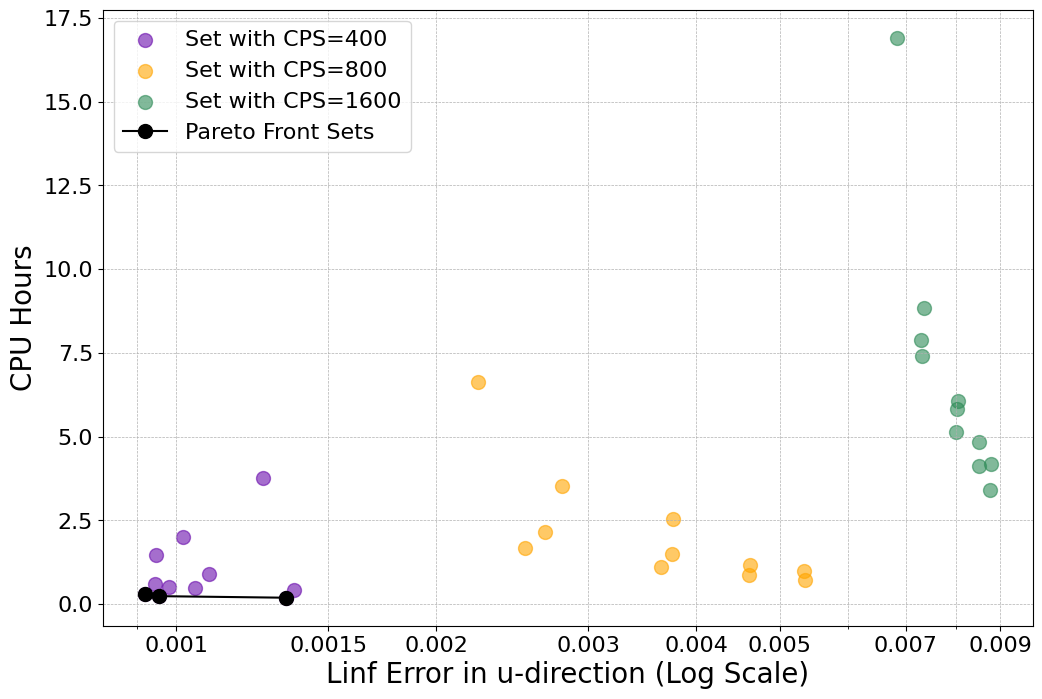

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600 

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['Linf_Error_1', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('Linf_Error_1')

# Plotting
fig, ax = plt.subplots(figsize=(12,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0, 0.001,0.0015,0.002,0.003,0.004, 0.005, 0.007, 0.009]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=16)

# use different colors for different CPS values
cps_values = df['cps'].unique()
colors = ['#6a0dad','#ffa500','#2e8b57']  
color_map = dict(zip(cps_values, colors))

# Plot all points with color according to CPS value
for cps, color in color_map.items():
    subset = df[df['cps'] == cps]
    ax.scatter(subset['Linf_Error_1'], subset['CPU_hours'], color=color, label=f'Set with CPS={cps}', alpha=0.6, s=100)

# Plot Pareto front curve
ax.plot(pareto_points['Linf_Error_1'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('Linf Error in u-direction (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=16)

plt.show()
fig.savefig('error_Linf_u_1.png')



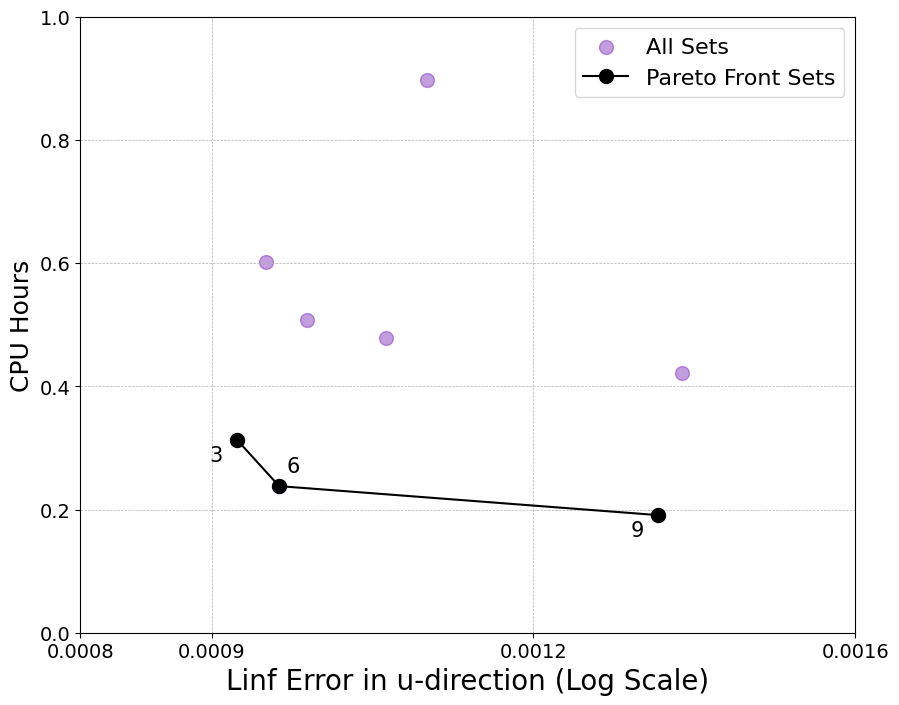

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600  

def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

scores = df[['Linf_Error_1', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

pareto_points = df[df['Pareto']].sort_values('Linf_Error_1')

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale('log')

xticks = [0, 0.0004, 0.0008, 0.0009, 0.0012, 0.0016]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=14)

ax.tick_params(axis='y', which='major', labelsize=14)  # set the font size of the y-axis ticks

ax.scatter(df['Linf_Error_1'], df['CPU_hours'], color='#6a0dad', label='All Sets', alpha=0.4, s=100) 
ax.plot(pareto_points['Linf_Error_1'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10) 

# set the axis to zoom in the area of small L2 Error 2 and CPU hours
ax.set_xlim( 0.0008, 0.0016) 
ax.set_ylim(0, 1.0)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# mark the Pareto front points with their index
for index, row in pareto_points.iterrows():
    if row['Linf_Error_1'] <= 0.05 and row['CPU_hours'] <= 1.5: 
        vertical_offset = 10 if index % 2 == 0 else -15  
        ax.annotate(index, (row['Linf_Error_1'], row['CPU_hours']), textcoords="offset points", xytext=(vertical_offset, vertical_offset), ha='center', fontsize=15)

# Add a text box to show the details of the Pareto front points
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={row['cps']}, steps={row['num_steps']}, cores={row['Core']}"
    for index, row in pareto_points.iterrows()
    if row['Linf_Error_1'] <= 0.05 and row['CPU_hours'] <= 1.5
])

# plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Linf Error in u-direction (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=18)
ax.legend(fontsize=16)  
plt.show()
fig.savefig('error_Linf_u_3.png')



# Error_Linf_v

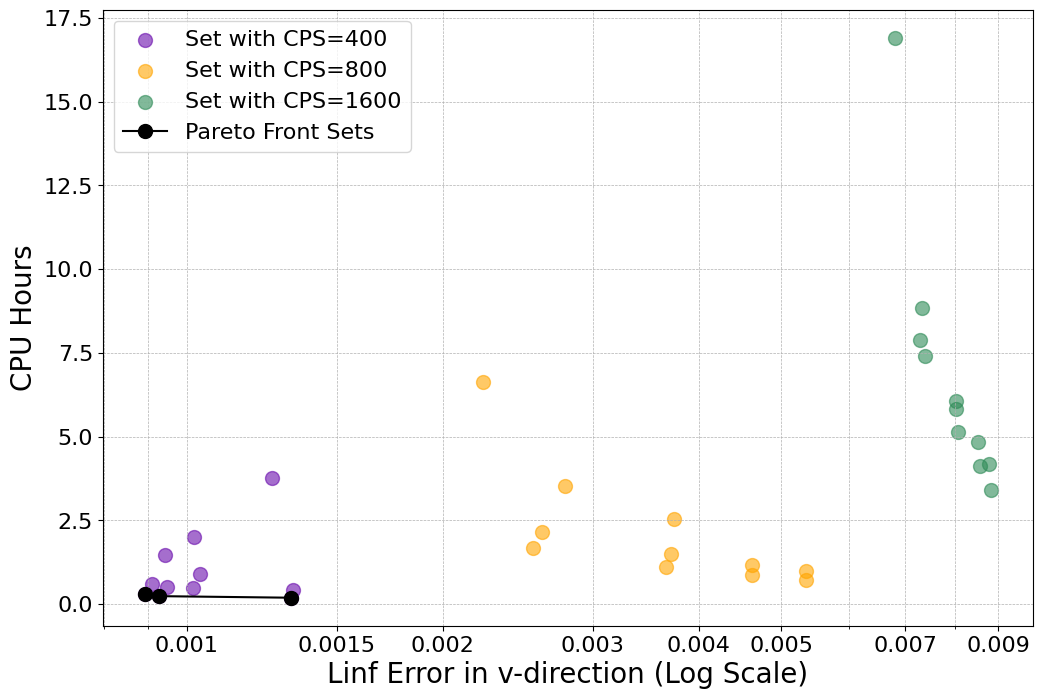

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600 

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['Linf_Error_2', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('Linf_Error_2')

# Plotting
fig, ax = plt.subplots(figsize=(12,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0, 0.001,0.0015,0.002,0.003,0.004, 0.005,  0.007,  0.009]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=16)

# use different colors for different CPS values
cps_values = df['cps'].unique()
colors = ['#6a0dad','#ffa500','#2e8b57']  
color_map = dict(zip(cps_values, colors))

# Plot all points with color according to CPS value
for cps, color in color_map.items():
    subset = df[df['cps'] == cps]
    ax.scatter(subset['Linf_Error_2'], subset['CPU_hours'], color=color, label=f'Set with CPS={cps}', alpha=0.6, s=100)

# Plot Pareto front curve
ax.plot(pareto_points['Linf_Error_2'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('Linf Error in v-direction (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=16)

plt.show()
fig.savefig('error_Linf_v_1.png')



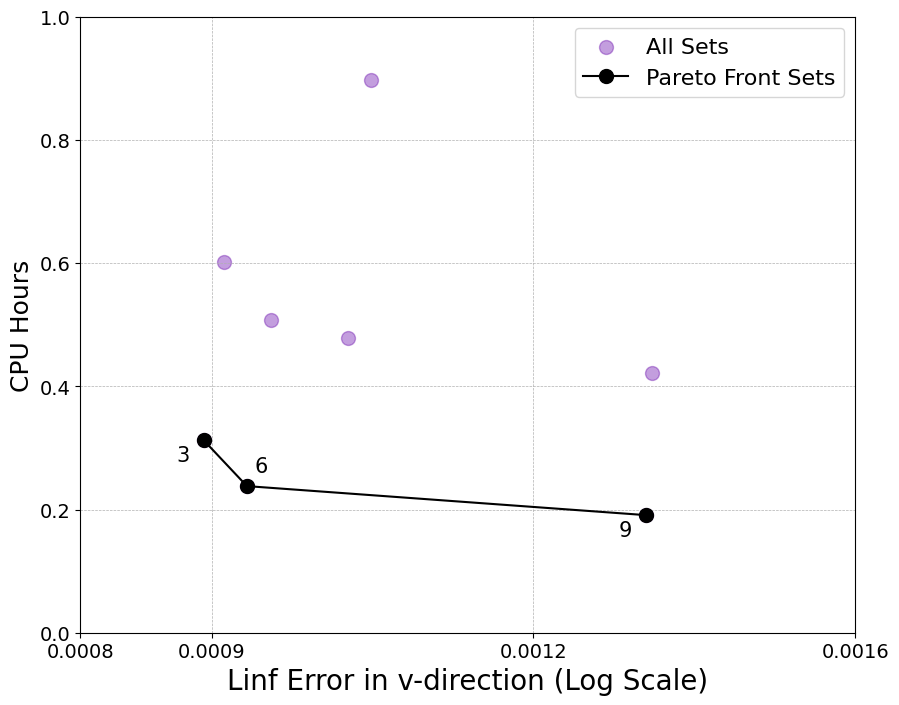

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600  

def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

scores = df[['Linf_Error_2', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

pareto_points = df[df['Pareto']].sort_values('Linf_Error_2')

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale('log')

xticks = [0, 0.0004, 0.0008, 0.0009, 0.0012, 0.0016]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=14)

ax.tick_params(axis='y', which='major', labelsize=14)  # set the font size of the y-axis ticks

ax.scatter(df['Linf_Error_2'], df['CPU_hours'], color='#6a0dad', label='All Sets', alpha=0.4, s=100) 
ax.plot(pareto_points['Linf_Error_2'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10) 

# set the axis to zoom in the area of small L2 Error 2 and CPU hours
ax.set_xlim( 0.0008, 0.0016) 
ax.set_ylim(0, 1.0)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# mark the Pareto front points with their index
for index, row in pareto_points.iterrows():
    if row['Linf_Error_2'] <= 0.05 and row['CPU_hours'] <= 1.5: 
        vertical_offset = 10 if index % 2 == 0 else -15  
        ax.annotate(index, (row['Linf_Error_2'], row['CPU_hours']), textcoords="offset points", xytext=(vertical_offset, vertical_offset), ha='center', fontsize=15)

# Add a text box to show the details of the Pareto front points
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={row['cps']}, steps={row['num_steps']}, cores={row['Core']}"
    for index, row in pareto_points.iterrows()
    if row['Linf_Error_2'] <= 0.05 and row['CPU_hours'] <= 1.5
])

# plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Linf Error in v-direction (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=18)
ax.legend(fontsize=16)  
plt.show()

fig.savefig('error_Linf_v_3.png')


# error_L2 sqrt(u^2+v^2)

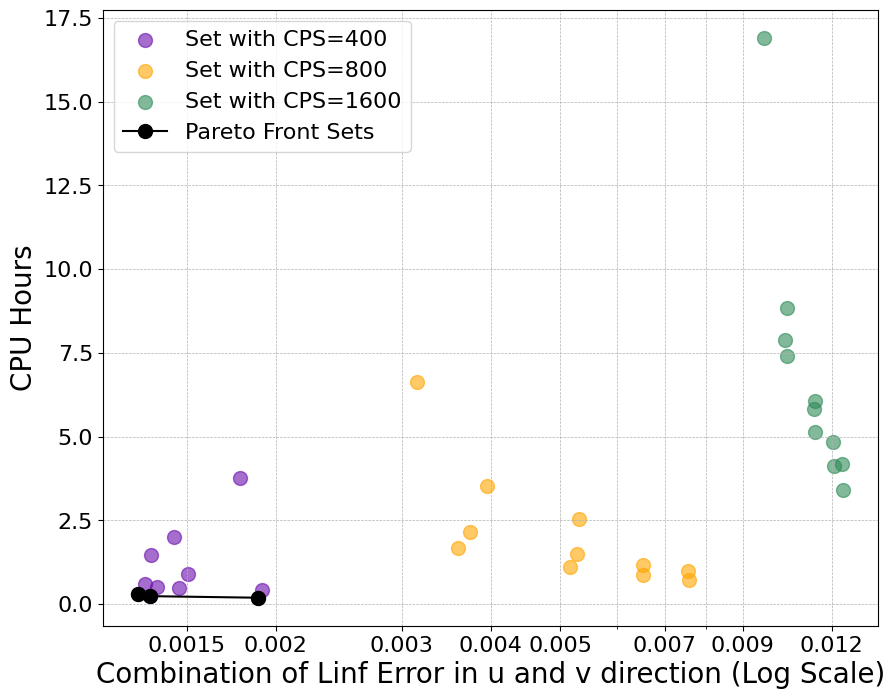

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600 
df['L2_Error_sqrt'] = np.sqrt(df['Linf_Error_1']**2 + df['Linf_Error_2']**2)

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['L2_Error_sqrt', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('L2_Error_sqrt')

# Plotting
fig, ax = plt.subplots(figsize=(10,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0, 0.001,0.0015,0.002,0.003,0.004, 0.005,   0.007,  0.009, 0.012]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=16)

# use different colors for different CPS values
cps_values = df['cps'].unique()
colors = ['#6a0dad','#ffa500','#2e8b57']  
color_map = dict(zip(cps_values, colors))

# Plot all points with color according to CPS value
for cps, color in color_map.items():
    subset = df[df['cps'] == cps]
    ax.scatter(subset['L2_Error_sqrt'], subset['CPU_hours'], color=color, label=f'Set with CPS={cps}', alpha=0.6, s=100)

# Plot Pareto front curve
ax.plot(pareto_points['L2_Error_sqrt'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('Combination of Linf Error in u and v direction (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=16)

plt.show()
fig.savefig('error_Linf_sqrt_1.png')



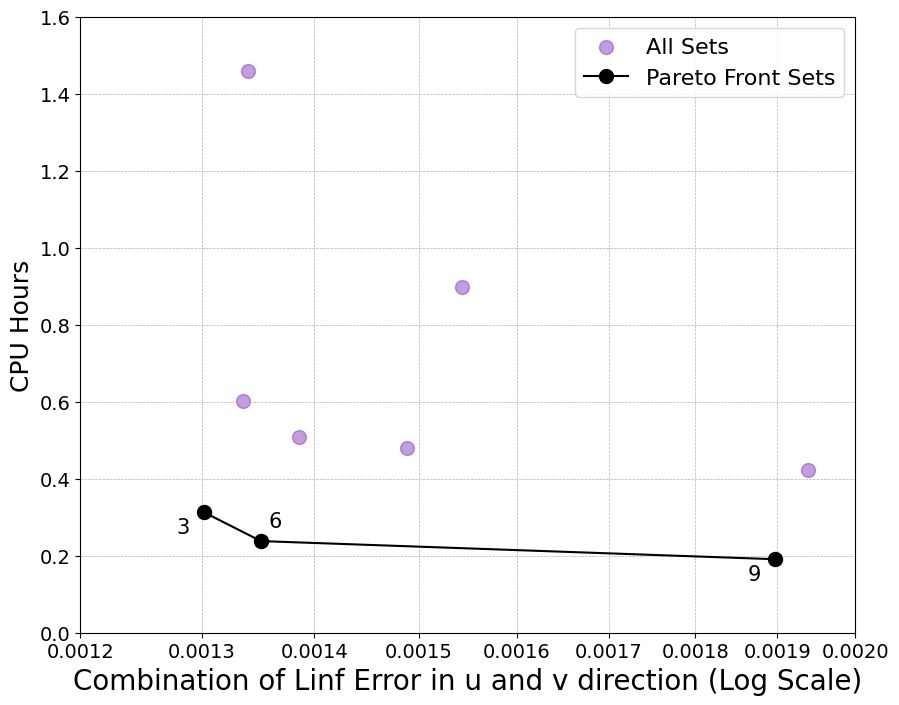

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600  
df['L2_Error_sqrt'] = np.sqrt(df['Linf_Error_1']**2 + df['Linf_Error_1']**2)
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

scores = df[['L2_Error_sqrt', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

pareto_points = df[df['Pareto']].sort_values('L2_Error_sqrt')

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale('log')

xticks = [ 0.0012, 0.0013, 0.0014,0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002]  # choose appropriate ticks based on your data  
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=14)

ax.tick_params(axis='y', which='major', labelsize=14)  # set the font size of the y-axis ticks

ax.scatter(df['L2_Error_sqrt'], df['CPU_hours'], color='#6a0dad', label='All Sets', alpha=0.4, s=100) 
ax.plot(pareto_points['L2_Error_sqrt'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10) 

# set the axis to zoom in the area of small L2 Error 2 and CPU hours
ax.set_xlim(0.0012,  0.002) 
ax.set_ylim(0, 1.6)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# mark the Pareto front points with their index
for index, row in pareto_points.iterrows():
    if row['L2_Error_sqrt'] <= 0.05 and row['CPU_hours'] <= 1.5: 
        vertical_offset = 10 if index % 2 == 0 else -15 
        ax.annotate(index, (row['L2_Error_sqrt'], row['CPU_hours']), textcoords="offset points", xytext=(vertical_offset, vertical_offset), ha='center', fontsize=15)

# Add a text box to show the details of the Pareto front points
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={row['cps']}, steps={row['num_steps']}, cores={row['Core']}"
    for index, row in pareto_points.iterrows()
    if row['L2_Error_sqrt'] <= 0.05 and row['CPU_hours'] <= 1.5
])

# plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Combination of Linf Error in u and v direction (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=18)
ax.legend(fontsize=16)  
plt.show()
fig.savefig('error_Linf_sqrt_3.png')



# Error_Linf_p

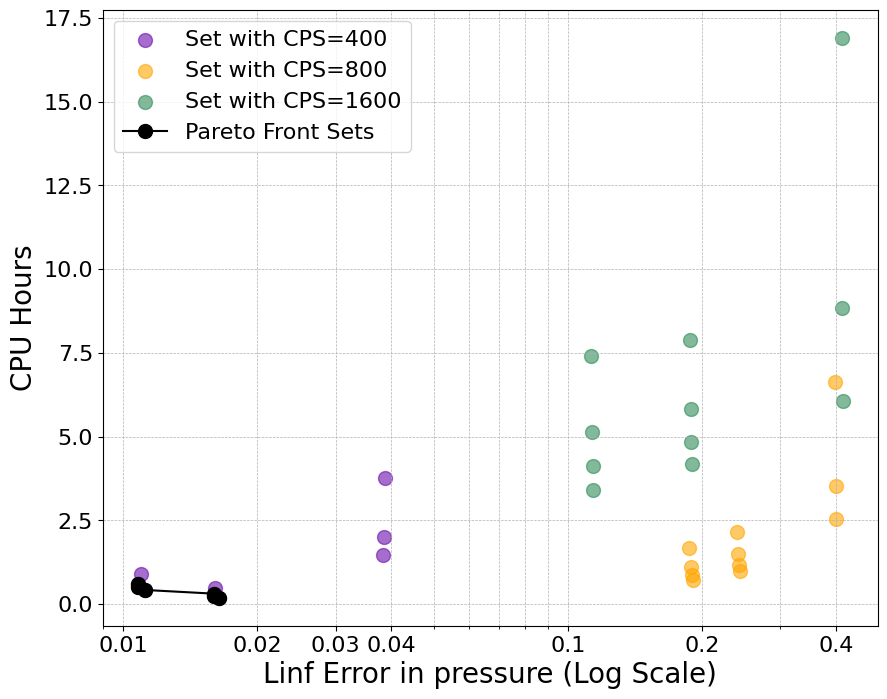

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data 
file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

# calculate total CPU hours (assuming Core is the number of cores and Elapsed_time is in hours)
df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600 

# Define a function to identify the Pareto front
def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

# Error and CPU hours as the scores to optimize
scores = df[['Linf_Error_3', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

# Filter out the Pareto front points and sort by L2 Error 1
pareto_points = df[df['Pareto']].sort_values('Linf_Error_3')

# Plotting
fig, ax = plt.subplots(figsize=(10,8))

# Set log scale for error
ax.set_xscale('log')

# Set x-axis ticks to specific values
xticks = [0,  0.01, 0.02,0.03,0.04, 0.1, 0.2, 0.4, 0.6, 0.8 ]  # define the value of xticks 
ax.set_xticks(xticks)
ax.set_xticklabels([str(tick) for tick in xticks], fontsize=16)

# use different colors for different CPS values
cps_values = df['cps'].unique()
colors = ['#6a0dad','#ffa500','#2e8b57']  
color_map = dict(zip(cps_values, colors))

# Plot all points with color according to CPS value
for cps, color in color_map.items():
    subset = df[df['cps'] == cps]
    ax.scatter(subset['Linf_Error_3'], subset['CPU_hours'], color=color, label=f'Set with CPS={cps}', alpha=0.6, s=100)

# Plot Pareto front curve
ax.plot(pareto_points['Linf_Error_3'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10)

# Customize the axis ticks and grid
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize labels, title, and legend
plt.xlabel('Linf Error in pressure (Log Scale)', fontsize=20)
plt.ylabel('CPU Hours', fontsize=20)
plt.legend(fontsize=16)

plt.show()
fig.savefig('error_Linf_p_1.png')



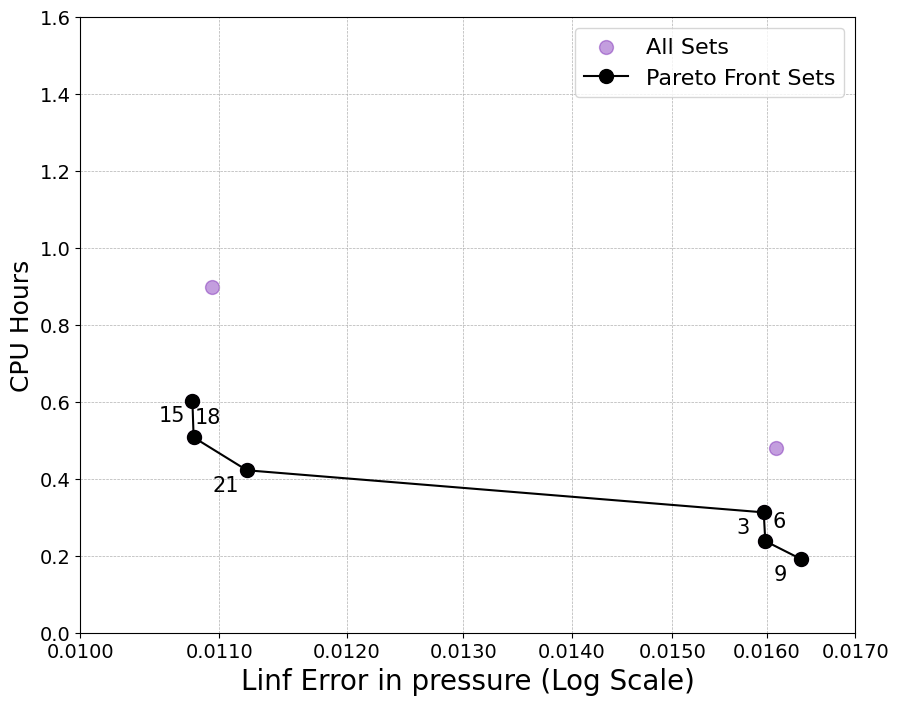

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.transforms import Bbox
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path="../data/results_avg.csv"
df = pd.read_csv(file_path)

df['CPU_hours'] = df['Core'] * df['Elapsed_time'] / 3600  

def identify_pareto(scores):
    pareto_front = [True] * len(scores)
    for i, score_i in enumerate(scores):
        for j, score_j in enumerate(scores):
            if all(score_j <= score_i) and any(score_j < score_i):
                pareto_front[i] = False
                break
    return pareto_front

scores = df[['Linf_Error_3', 'CPU_hours']].values
pareto = identify_pareto(scores)
df['Pareto'] = pareto

pareto_points = df[df['Pareto']].sort_values('Linf_Error_3')

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xscale('log')

xticks = [ 0.01, 0.011, 0.012, 0.013, 0.014,0.015, 0.016, 0.017]  # choose appropriate ticks based on your data  
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=14)

ax.tick_params(axis='y', which='major', labelsize=14)  # set the font size of the y-axis ticks

ax.scatter(df['Linf_Error_3'], df['CPU_hours'], color='#6a0dad', label='All Sets', alpha=0.4, s=100) 
ax.plot(pareto_points['Linf_Error_3'], pareto_points['CPU_hours'], color='black', marker='o', label='Pareto Front Sets', markersize=10) 

# set the axis to zoom in the area of small L2 Error 2 and CPU hours
ax.set_xlim(0.01,  0.017) 
ax.set_ylim(0, 1.6)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# mark the Pareto front points with their index
for index, row in pareto_points.iterrows():
    if row['Linf_Error_3'] <= 0.05 and row['CPU_hours'] <= 1.5: 
        vertical_offset = 10 if index % 2 == 0 else -15 
        ax.annotate(index, (row['Linf_Error_3'], row['CPU_hours']), textcoords="offset points", xytext=(vertical_offset, vertical_offset), ha='center', fontsize=15)

# Add a text box to show the details of the Pareto front points
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={row['cps']}, steps={row['num_steps']}, cores={row['Core']}"
    for index, row in pareto_points.iterrows()
    if row['Linf_Error_3'] <= 0.05 and row['CPU_hours'] <= 1.5
])

# plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Linf Error in pressure (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=18)
ax.legend(fontsize=16)  
plt.show()
fig.savefig('error_Linf_p_3.png')



# run pareto point with 25 number of iterations 

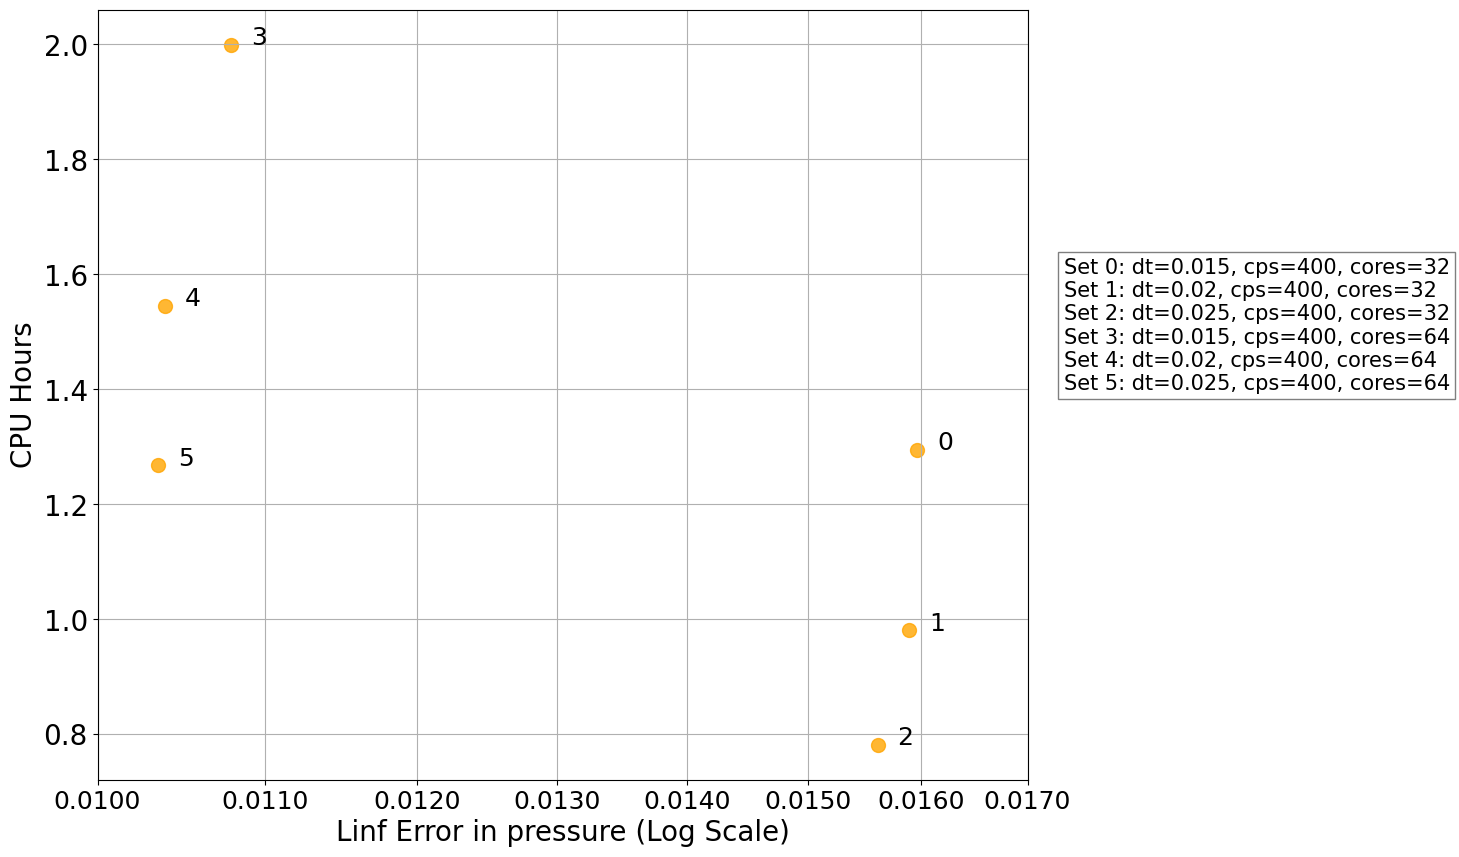

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Provided data
file_path = "../data/results_avg_iter.csv"
data = pd.read_csv(file_path)

# Convert Elapsed_time from seconds to hours
data['CPU_hours'] = data['Core'] * data['Elapsed_time'] / 3600  

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xscale('log')
xticks = [0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017]  # choose appropriate ticks based on your data  
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=18)
plt.scatter(data['Linf_Error_3'], data['CPU_hours'], color='#ffa500', label='All Sets', alpha=0.8, s=100)

ax.tick_params(axis='y', labelsize=20)  
ax.set_xlim( 0.01, 0.017) 

# Annotating each point with cps, dt, core, and index in vertical format
for i in range(len(data['Linf_Error_3'])):
    label = f"{i}"
    plt.annotate(label, (data['Linf_Error_3'][i], data['CPU_hours'][i]), textcoords="offset points", xytext=(20,0), ha='center', fontsize=18)

# External text annotations
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={int(row['cps'])}, cores={int(row['Core'])}"
    for index, row in data.iterrows()
])

# Adding text box outside the plot
plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Linf Error in pressure (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=20)
plt.grid(True)
plt.show()

# Saving the figure
fig.savefig('../plot_result/error_Linf_p_iter.png')



/tmp/ipykernel_2266517/981807620.py:20: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim( 0, 0.017)


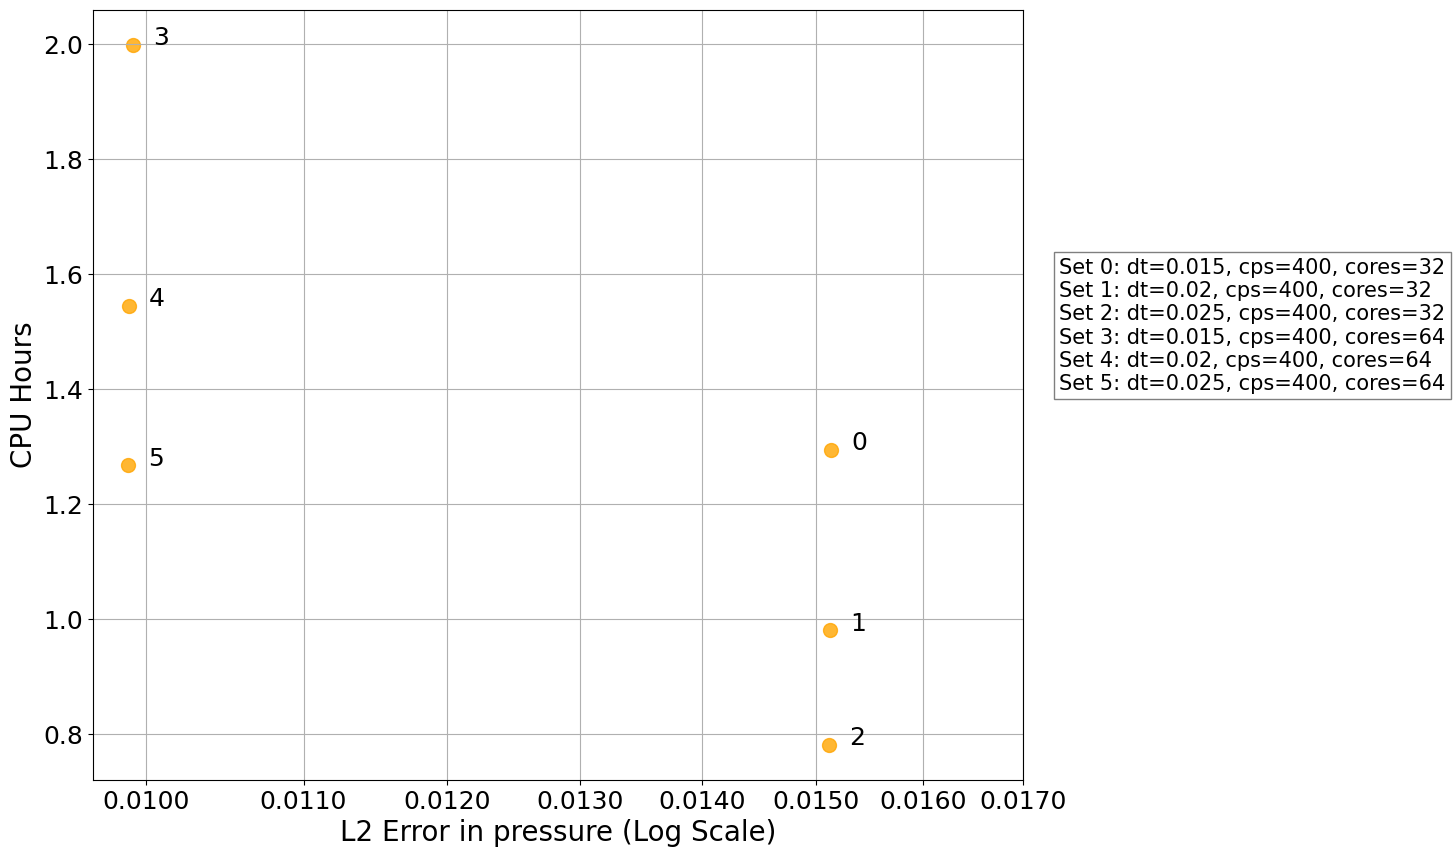

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Provided data
file_path = "../data/results_avg_iter.csv"
data = pd.read_csv(file_path)

# Convert Elapsed_time from seconds to hours
data['CPU_hours'] = data['Core'] * data['Elapsed_time'] / 3600  

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xscale('log')
xticks = [0.005, 0.008, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017]  # choose appropriate ticks based on your data  
ax.set_xticks(xticks)
ax.set_xticklabels([f"{tick:.4f}" for tick in xticks], fontsize=18)
plt.scatter(data['L2_Error_3'], data['CPU_hours'], color='#ffa500', label='All Sets', alpha=0.8, s=100)

ax.tick_params(axis='y', labelsize=18)  
ax.set_xlim( 0, 0.017) 

# Annotating each point with cps, dt, core, and index in vertical format
for i in range(len(data['L2_Error_3'])):
    label = f"{i}"
    plt.annotate(label, (data['L2_Error_3'][i], data['CPU_hours'][i]), textcoords="offset points", xytext=(20,0), ha='center', fontsize=18)

# External text annotations
textstr = '\n'.join([
    f"Set {index}: dt={row['dt']}, cps={int(row['cps'])}, cores={int(row['Core'])}"
    for index, row in data.iterrows()
])

# Adding text box outside the plot
plt.gcf().text(0.93, 0.5, textstr, fontsize=15, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('L2 Error in pressure (Log Scale)', fontsize=20)
ax.set_ylabel('CPU Hours', fontsize=20)
plt.grid(True)
plt.show()

# Saving the figure
fig.savefig('../plot_result/error_L2_p_iter.png')

